# RMA (Return Merchandise Authorization) Prediction assignment

**Welcome to 'RMA Prediction' assignment, Below is a brief background:**

Return merchandise authorization (RMA) is the process of returning a product to receive a refund, replacement, or repair during the product's warranty period. 

In the chip manufacturing industry, in particular, the manufacturers have an interest in detect these units before it being shipped and reach the market for a few reasons:

- The cost of a single unit during production is nil, compared to replacing an entire end device that causes several times more damage

- The damage done to a company's reputation when a new device is returned as bad one can be very significant

- A malfunctioning unit can cause significant damage (you don't want such bad unit placed in ABS system of your car :) )

There are detailed test programs in which thousands of tests are performed on chips during production to ensure quality and prevent such cases.

RMA units along with non-RMA units have passed all test cycles properly, and yet have been found to be defective in the field.

The manufacturers are aware that there are such units and their goal is to predict which units will be malfunctioning soon even though they now appear to be working properly. Once predicting such units, they will mark them as bad and not ship them to customers.
Secondary goal is to avoid excessive scrap of good units by marking good units as bad to avoid significant financial loss.


This use case is called "RMA Prediction" and this is the challenge you are required to deal with in this assignment!

**Technical notes:**

- Please follow the steps in this notebook

- Please write all your code inside this notebook only

- Please feel free to add more cells as you need

- The goal of this assigment is not only the best model:
    - There is also value in clean code, and in orderly and clear work
    - Use visualizations and comments on the reasons for the actions you take
    - It is recommended to show in the notebook also experiments you tried along the way


- Avoid over-fitting

    - Your prediction results will be tested on a test set that its lables are not available to you


Good Luck!

# Packages

First, import all the packages you'll need during this assignment. You can finish successfully this assigment with these packages only but feel free to use more libraries if you find it helpful

- [numpy](www.numpy.org) is the main package for scientific computing with Python.
- [pandas](https://pandas.pydata.org/) is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [matplotlib](http://matplotlib.org) is a library to plot graphs in Python.
- [sklearn](https://scikit-learn.org/stable/) is the most useful and robust library for machine learning in Python.
- [f1_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) Is the metric you should use to evaluate the performance of your model.
- [pickle](https://docs.python.org/3/library/pickle.html) is a library for serializing and de-serializing Python object structures, also called marshalling or flattening
- np.random.seed(1) is used to keep all the random function calls consistent. It helps grade your work. Please don't change the seed! 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, fbeta_score
import pickle
np.random.seed(seed=1)

from sklearn import preprocessing
from copy import deepcopy

# Load The Data

First, let's load the data:

In [ ]:
url_data_train = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_train_data.csv')
url_data_test = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_test_data.csv')
df_rma_train, df_rma_test = pd.read_csv(url_data_train), pd.read_csv(url_data_test)

We will now examine the dimensions of the data:

In [ ]:
df_rma_train.shape, df_rma_test.shape

((3616, 17), (905, 16))

It can be seen that in the train set there is one column more than the test set.

We will now print the first five rows of the DataFrame to see the values of the data.

In [ ]:
df_rma_train.head()

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15,RMA
0,261.36,E,Low,OP-1,True,102.14,False,True,2018.0,58.9,nov,136,1,120,1,TP-1549,False
1,268.62,H,Mid,OP-17,True,655.42,False,True,2018.0,62.0,apr,114,1,152,2,TP-1549,False
2,297.66,F,Low,OP-1,True,605.50,False,False,2018.0,65.1,nov,285,3,116,4,TP-1549,False
3,515.46,NaN,Low,OP-17,True,144.78,True,True,2018.0,83.7,jan,208,1,93,2,TP-1549,False
4,290.40,D,Low,OP-4,True,416.22,False,True,2019.0,37.2,may,58,2,334,1,TP-1549,False


In [ ]:
df_rma_test.head()

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15
0,268.62,C,Low,OP-17,True,1116.14,False,True,2018.0,6.2,feb,289,2,174,4,TP-9941
1,268.62,D,Low,OP-4,True,53.00,False,True,2018.0,18.6,may,226,1,363,3,TP-9941
2,246.84,D,Low,OP-1,True,275.56,False,True,2018.0,62.0,apr,470,1,150,5,TP-9941
3,333.96,B,Low,OP-1,True,53.00,False,True,2018.0,68.2,jun,154,1,124,1,TP-9941
4,261.36,B,Mid,OP-1,True,438.32,False,True,2018.0,55.8,nov,177,2,174,1,TP-9941


As you can see there are 16 independent variables all 'Test_i' (i: 0-15) columns, and one variable is dependent, 'RMA' column.

The purpose of the assignment is to predict the value of the 'RMA' variable according to the value of the other variables in the data. Please remember to use visualizations, explain the actions you perform by comments, and show your workflow clearly.

Note that the test set has no labels. Your assignment goal is to build a machine learning model that will predict the labels for it.

# Exploratory Data Analysis (EDA)

## What is EDA? 

Exploratory Data Analysis: this is unavoidable and one of the major step to fine-tune the given data set(s) in a different form of analysis to understand the insights of the key characteristics of various entities of the data set like column(s), row(s) by applying Pandas, NumPy, Statistical Methods, and Data visualization packages. EDA process should make you familiar with your data set.

- Outcome of this phase can be but not limited to:

    - Dataset charechtaristics.
    - Features relationship.
    - Target ('RMA' column) insights. 
    - Any interesting thing you can learn about the dataset.
    
**Goal of this phase is to implement EDA process for RMA data set**

#### 1.1 Create function which load the data

In [ ]:
def load_data():
    url_data_train = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_train_data.csv')
    url_data_test = (r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_test_data.csv')
    df_rma_train, df_rma_test = pd.read_csv(url_data_train), pd.read_csv(url_data_test)
    return df_rma_train, df_rma_test

#### 1.1 See info about the data (type oc columns and number of null values).


In [ ]:
df_rma_train, df_rma_test = load_data()

df_rma_train.info()
df_rma_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3616 entries, 0 to 3615
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Test_0   3616 non-null   float64
 1   Test_1   3585 non-null   object 
 2   Test_2   3616 non-null   object 
 3   Test_3   3475 non-null   object 
 4   Test_4   3616 non-null   bool   
 5   Test_5   3616 non-null   float64
 6   Test_6   3616 non-null   bool   
 7   Test_7   3616 non-null   bool   
 8   Test_8   2571 non-null   float64
 9   Test_9   3616 non-null   float64
 10  Test_10  3616 non-null   object 
 11  Test_11  3616 non-null   int64  
 12  Test_12  3616 non-null   int64  
 13  Test_13  3616 non-null   int64  
 14  Test_14  3616 non-null   int64  
 15  Test_15  649 non-null    object 
 16  RMA      3616 non-null   bool   
dtypes: bool(4), float64(4), int64(4), object(5)
memory usage: 381.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 16 col

In [ ]:
df_rma_train.describe()

,Test_0,Test_5,Test_8,Test_9,Test_11,Test_12,Test_13,Test_14
count,3616.000000,3616.000000,2571.000000,3616.000000,3616.000000,3616.000000,3616.000000,3616.000000
mean,299.029281,424.817760,2018.094127,49.314519,268.305310,2.797566,39.754701,0.529591
std,77.186039,803.049832,0.292062,25.587803,269.794165,3.009244,101.007732,1.630012
min,137.940000,-488.320000,2018.000000,3.100000,4.000000,1.000000,-1.000000,0.000000
25%,239.580000,70.940000,2018.000000,24.800000,104.000000,1.000000,-1.000000,0.000000
50%,283.140000,167.140000,2018.000000,49.600000,188.000000,2.000000,-1.000000,0.000000
75%,355.740000,435.070000,2018.000000,65.100000,328.000000,3.000000,-1.000000,0.000000
max,631.620000,18561.880000,2019.000000,96.100000,3025.000000,44.000000,871.000000,25.000000


In [ ]:
df_rma_test.describe()

,Test_0,Test_5,Test_8,Test_9,Test_11,Test_12,Test_13,Test_14
count,905.000000,905.000000,626.000000,905.000000,905.00000,905.000000,905.000000,905.000000
mean,298.357923,415.192641,2018.094249,49.428729,246.60442,2.777901,39.814365,0.594475
std,75.192154,694.737801,0.292409,25.501476,214.88421,3.484536,96.551713,1.926806
min,137.940000,-808.380000,2018.000000,3.100000,5.00000,1.000000,-1.000000,0.000000
25%,239.580000,71.200000,2018.000000,27.900000,104.00000,1.000000,-1.000000,0.000000
50%,283.140000,177.280000,2018.000000,52.700000,179.00000,2.000000,-1.000000,0.000000
75%,355.740000,448.200000,2018.000000,65.100000,332.00000,3.000000,-1.000000,0.000000
max,573.540000,7166.340000,2019.000000,96.100000,1516.00000,50.000000,500.000000,24.000000


#### 1.2 explolre the non null values.

First we look on the non-null columns to investigate the distribution of the data

-  **clean_df(df)** - clean the dataframe from rows with null values and replace boolean with integer values for plotting the results later.

-  **numeric_df(df)** - convert categorical values (such as **A** or **OP-4**) into integers for preprocessing the data later.

-  **clean_axes(ax, n_rows, n_cols)** - clean the axes of **suplot** with n_rows and n_cols to make the graphs look more beautiful.


-  **plot_histograms_features(df_list, text, alpha, fig_size=(50, 20))** - plot hisgoram of each feature in each df in **df_list** with clarity levels **alpha**.

In [ ]:
def clean_df(df):
    df = df.dropna()
    df = df.replace({False: 0, True: 1})
    return df

def numeric_df(df):
    mapping = {False: 0, True: 1,
               'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'J': 10, 'K': 11, 'L': 12,
               'Low': 1, 'Mid': 2, 'High': 3,
               'OP-1': 1, 'OP-4': 2, 'OP-17': 3,
               'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12,
               'TP-1549': 1, 'TP-235z': 2, 'TP-9941': 3}
    return df.replace(mapping)

def clean_axes(ax, n_rows, n_cols):
    for r in range(n_rows):
        for c in range(n_cols):
            ax[r, c].set_visible(False)

def plot_histograms_features(df_list, text, alpha, fig_size=(50, 20)):
    colunms_lengths = np.array([[df.shape[1] for df in df_list]])
    max_cols_idx = np.argmax(colunms_lengths)
    max_cols = colunms_lengths[max_cols_idx][0]
    n_rows = int(np.ceil(max_cols ** (1/2)))
    fig, ax = plt.subplots(n_rows, n_rows, figsize=fig_size)
    clean_axes(ax, n_rows, n_rows)
    for i, feat in enumerate(df_list[max_cols_idx].columns):
        r, c = int(i / n_rows), i % n_rows
        ax[r, c].set_visible(True)
        for df, TEXT, ALPHA in zip(df_list, text, alpha):
            n_bins = min(100, 3 * len(set(df_list[0][feat])))
            if feat in df.columns:
                ax[r, c].hist(df[feat], bins=n_bins, weights=np.ones_like(df[feat]) / len(df[feat]), label=TEXT, alpha=ALPHA)
        ax[r, c].set_title(f'{feat}', fontsize=14)
        ax[r, c].legend(loc='upper right')
        ax[r, c].grid()
    plt.show()

#### 1.3 See statistics of the non-null data

In [ ]:
clean_df_rma_train = clean_df(df_rma_train)
clean_df_rma_train.describe()

,Test_0,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_11,Test_12,Test_13,Test_14,RMA
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,302.285419,0.995074,460.720558,0.367816,0.866995,2018.090312,44.891461,278.881773,2.024631,225.635468,2.937603,0.228243
std,82.482347,0.070071,785.882156,0.482607,0.339859,0.286864,24.022379,251.137719,1.598020,116.306021,2.771337,0.420045
min,145.200000,0.000000,-311.000000,0.000000,0.000000,2018.000000,3.100000,5.000000,1.000000,1.000000,1.000000,0.000000
25%,239.580000,1.000000,89.140000,0.000000,1.000000,2018.000000,21.700000,119.000000,1.000000,138.000000,1.000000,0.000000
50%,283.140000,1.000000,214.980000,0.000000,1.000000,2018.000000,43.400000,207.000000,1.000000,190.000000,2.000000,0.000000
75%,348.480000,1.000000,456.000000,1.000000,1.000000,2018.000000,58.900000,333.000000,2.000000,333.000000,4.000000,0.000000
max,624.360000,1.000000,6892.560000,1.000000,1.000000,2019.000000,96.100000,1579.000000,11.000000,871.000000,25.000000,1.000000


In [ ]:
clean_df_rma_test = clean_df(df_rma_test)
clean_df_rma_test.describe()
clean_df_rma_test.head(10)

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15
0,268.62,C,Low,OP-17,1,1116.14,0,1,2018.0,6.2,feb,289,2,174,4,TP-9941
1,268.62,D,Low,OP-4,1,53.00,0,1,2018.0,18.6,may,226,1,363,3,TP-9941
2,246.84,D,Low,OP-1,1,275.56,0,1,2018.0,62.0,apr,470,1,150,5,TP-9941
3,333.96,B,Low,OP-1,1,53.00,0,1,2018.0,68.2,jun,154,1,124,1,TP-9941
4,261.36,B,Mid,OP-1,1,438.32,0,1,2018.0,55.8,nov,177,2,174,1,TP-9941
5,174.24,J,Mid,OP-1,1,185.08,0,1,2019.0,55.8,may,12,3,374,1,TP-9941
6,196.02,A,Mid,OP-1,1,904.76,1,1,2018.0,15.5,aug,106,1,110,2,TP-9941
7,246.84,F,Low,OP-1,1,-6.28,0,1,2018.0,62.0,apr,187,3,332,3,TP-9941
8,217.80,G,Low,OP-1,1,298.96,0,1,2018.0,58.9,nov,1065,1,183,1,TP-9941
9,188.76,F,Mid,OP-1,1,171.30,1,1,2018.0,89.9,jan,240,1,182,8,TP-9941


#### 1.4 plot the distribution of the clean data

0      261.36
1      268.62
2      297.66
4      290.40
5      261.36
        ...  
643    239.58
644    268.62
645    225.06
646    304.92
647    384.78
Name: Test_0, Length: 609, dtype: float64
0      268.62
1      268.62
2      246.84
3      333.96
4      261.36
        ...  
162    246.84
163    254.10
164    261.36
165    399.30
166    406.56
Name: Test_0, Length: 155, dtype: float64
0      E
1      H
2      F
4      D
5      F
      ..
643    D
644    F
645    A
646    H
647    B
Name: Test_1, Length: 609, dtype: object
0      C
1      D
2      D
3      B
4      B
      ..
162    H
163    C
164    C
165    H
166    L
Name: Test_1, Length: 155, dtype: object
0       Low
1       Mid
2       Low
4       Low
5       Low
       ... 
643     Mid
644     Low
645     Mid
646     Mid
647    High
Name: Test_2, Length: 609, dtype: object
0      Low
1      Low
2      Low
3      Low
4      Mid
      ... 
162    Low
163    Mid
164    Low
165    Low
166    Low
Name: Test_2, Length: 155, dtype: 

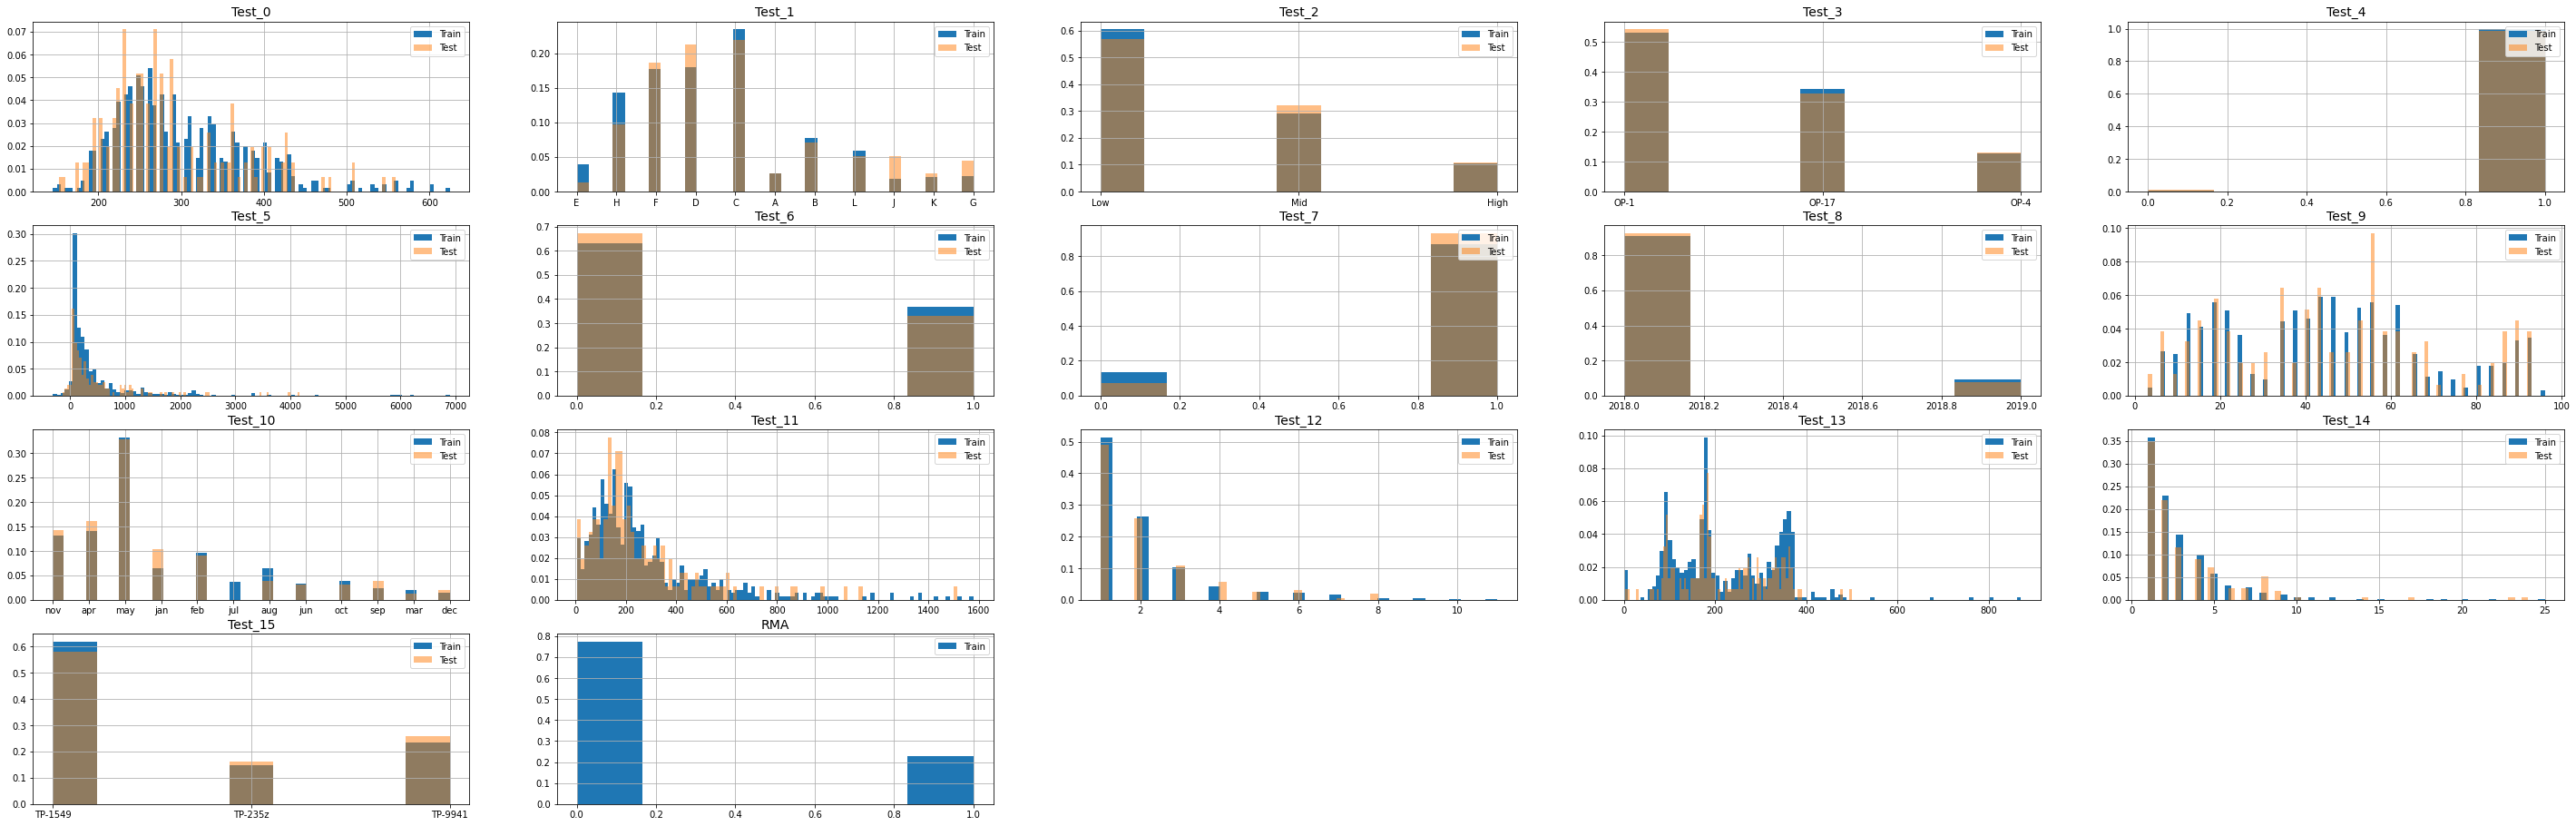

In [ ]:
plot_histograms_features([clean_df_rma_train, clean_df_rma_test], text=['Train', 'Test'], alpha=[1, 0.5])

#### 1.5 Correlation matrix of the clean data

In [ ]:
clean_df_rma_train.corr().style.background_gradient(cmap='coolwarm', axis=None)

,Test_0,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_11,Test_12,Test_13,Test_14,RMA
Test_0,1.000000,-0.031174,-0.006067,0.194167,0.035613,0.233131,0.040489,0.095909,-0.051507,-0.103342,-0.026526,0.079077
Test_4,-0.031174,1.000000,0.037178,0.053668,-0.027558,0.022169,0.016488,-0.069571,0.030462,-0.046639,-0.018525,-0.017618
Test_5,-0.006067,0.037178,1.000000,0.048702,0.085622,0.062389,-0.007060,-0.001023,0.033220,-0.064643,-0.002758,0.000810
Test_6,0.194167,0.053668,0.048702,1.000000,0.138314,0.127952,0.077505,0.029590,-0.028828,-0.308650,0.033175,0.226151
Test_7,0.035613,-0.027558,0.085622,0.138314,1.000000,0.072800,-0.003766,0.036506,-0.030299,0.030894,-0.031527,0.097789
Test_8,0.233131,0.022169,0.062389,0.127952,0.072800,1.000000,-0.001081,0.076903,0.063309,-0.078182,0.042271,-0.007553
Test_9,0.040489,0.016488,-0.007060,0.077505,-0.003766,-0.001081,1.000000,0.014833,-0.014772,-0.118438,-0.007254,0.065246
Test_11,0.095909,-0.069571,-0.001023,0.029590,0.036506,0.076903,0.014833,1.000000,-0.124224,-0.029857,0.045126,0.364162
Test_12,-0.051507,0.030462,0.033220,-0.028828,-0.030299,0.063309,-0.014772,-0.124224,1.000000,0.070941,0.087623,-0.052494
Test_13,-0.103342,-0.046639,-0.064643,-0.308650,0.030894,-0.078182,-0.118438,-0.029857,0.070941,1.000000,-0.063947,-0.128752


In [ ]:
clean_df_rma_test.corr().style.background_gradient(cmap='coolwarm', axis=None)

,Test_0,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_11,Test_12,Test_13,Test_14
Test_0,1.000000,-0.001396,0.183218,0.257197,0.053218,0.216674,0.023666,0.040678,-0.028001,-0.145273,-0.020530
Test_4,-0.001396,1.000000,0.070504,0.080064,0.191035,0.033120,-0.021389,0.102467,-0.176716,-0.121532,0.043766
Test_5,0.183218,0.070504,1.000000,0.155758,0.069869,0.088332,-0.074820,-0.064023,0.044660,-0.184524,0.019509
Test_6,0.257197,0.080064,0.155758,1.000000,0.033120,0.156784,0.235870,-0.076615,-0.058185,-0.356163,-0.048720
Test_7,0.053218,0.191035,0.069869,0.033120,1.000000,0.080064,-0.196795,-0.060830,-0.048453,-0.175698,0.041293
Test_8,0.216674,0.033120,0.088332,0.156784,0.080064,1.000000,-0.011759,-0.046106,0.138059,-0.092564,-0.055800
Test_9,0.023666,-0.021389,-0.074820,0.235870,-0.196795,-0.011759,1.000000,-0.010342,-0.006634,-0.117865,-0.062085
Test_11,0.040678,0.102467,-0.064023,-0.076615,-0.060830,-0.046106,-0.010342,1.000000,-0.084784,0.046766,0.005412
Test_12,-0.028001,-0.176716,0.044660,-0.058185,-0.048453,0.138059,-0.006634,-0.084784,1.000000,0.157550,0.065176
Test_13,-0.145273,-0.121532,-0.184524,-0.356163,-0.175698,-0.092564,-0.117865,0.046766,0.157550,1.000000,-0.090937


#### 1.6 Distribution of the numeric data

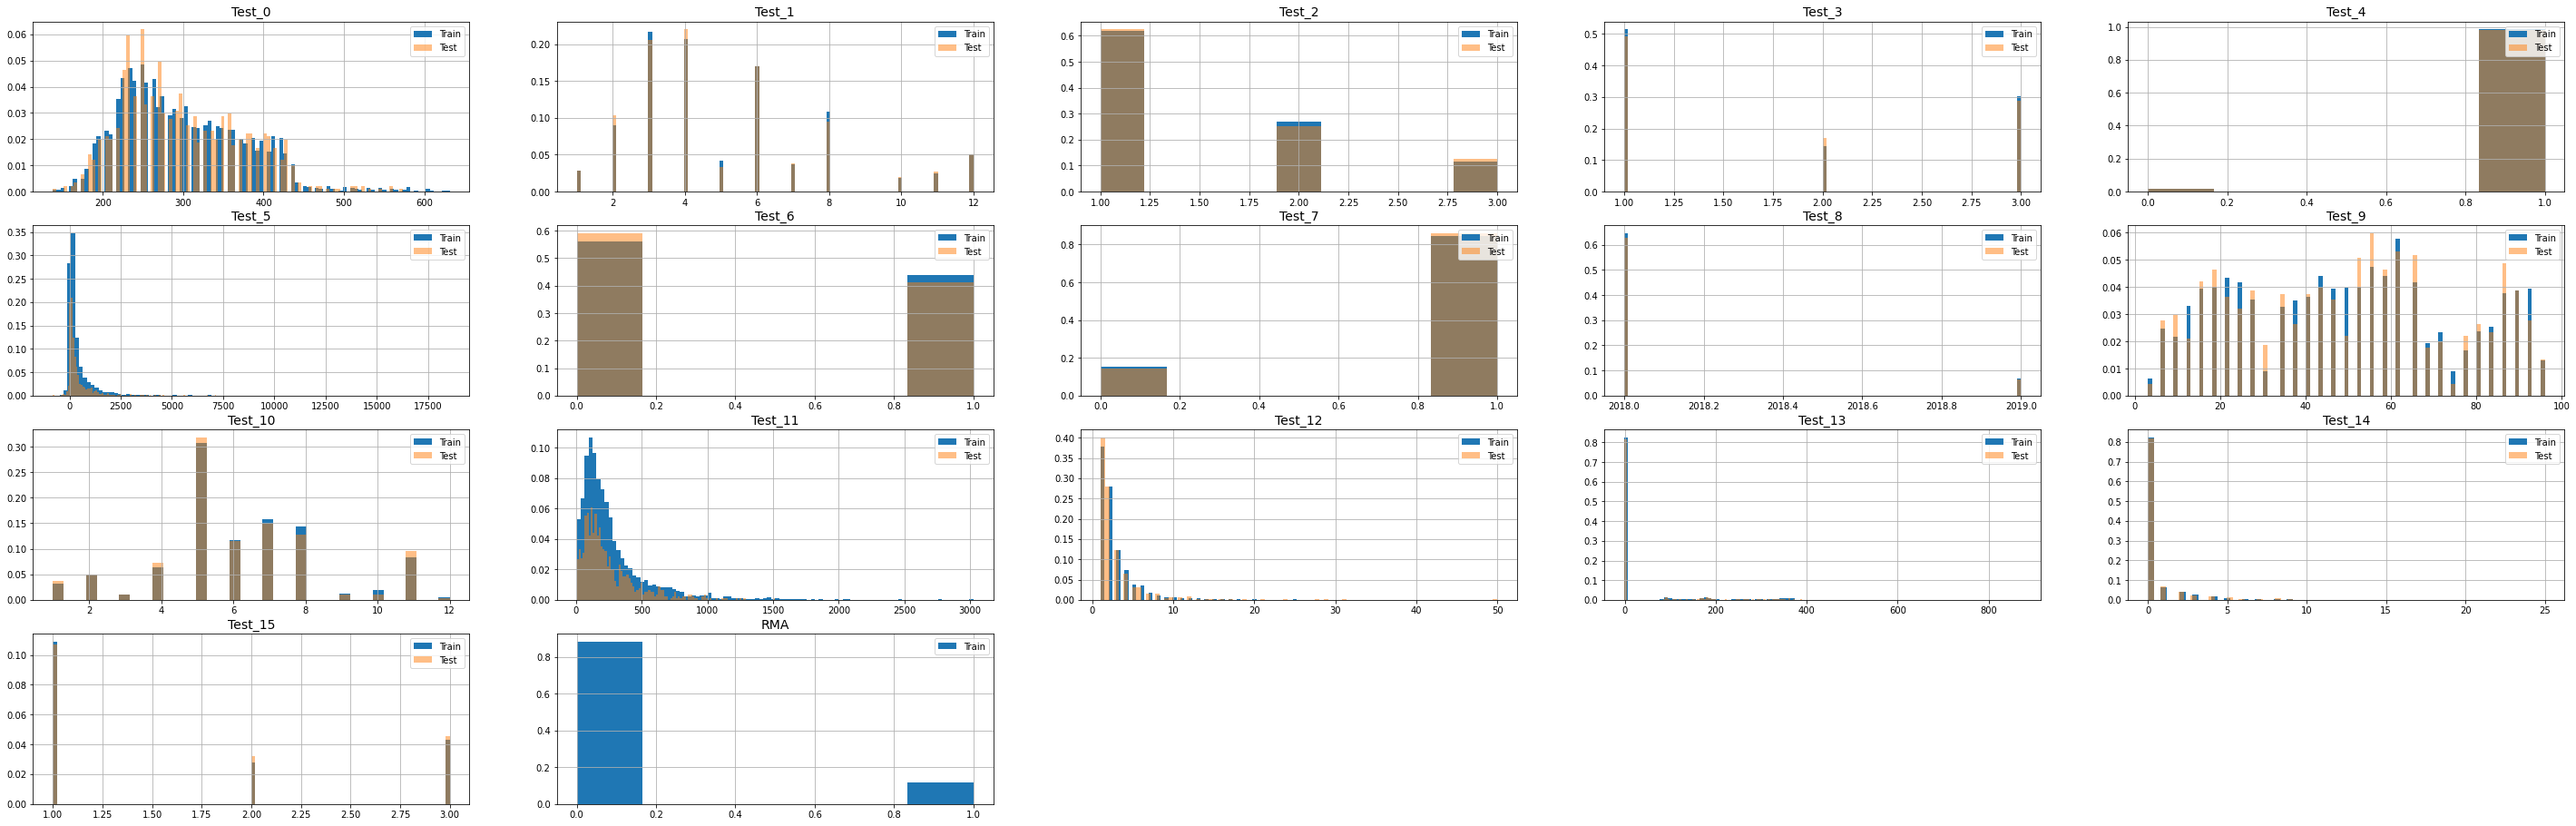

In [ ]:
numeric_df_rma_train = numeric_df(df_rma_train)
numeric_df_rma_test = numeric_df(df_rma_test)
plot_histograms_features([numeric_df_rma_train, numeric_df_rma_test], text=['Train', 'Test'], alpha=[1, 0.5])

Note that in features **Test_13** and **Test_14** we get high probability to be $-1$ and $0$ respectively that will casue to high correlation between these features.

#### 1.7 Coorelation matrix of the numeric data

In [ ]:
numeric_df_rma_train.corr().style.background_gradient(cmap='coolwarm', axis=None)

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15,RMA
Test_0,1.000000,0.254869,-0.130035,0.003113,0.014811,0.081823,0.189637,0.005672,0.207209,-0.013287,0.078913,-0.004954,-0.003104,0.000168,0.004483,-0.037219,0.054644
Test_1,0.254869,1.000000,-0.012943,-0.169183,-0.013338,0.047264,0.136365,-0.013615,0.102905,0.008979,0.027740,-0.015347,-0.035705,-0.006236,0.030460,0.006925,0.058396
Test_2,-0.130035,-0.012943,1.000000,0.034177,-0.055628,-0.035353,0.027322,0.007276,-0.030429,-0.001516,-0.021999,0.032355,-0.026522,0.005114,0.006191,0.062741,0.060542
Test_3,0.003113,-0.169183,0.034177,1.000000,0.029621,0.087984,0.108517,0.052720,-0.040651,0.007787,0.082247,-0.024029,0.019734,0.000623,0.015416,-0.011177,0.050394
Test_4,0.014811,-0.013338,-0.055628,0.029621,1.000000,0.068241,0.008545,0.053202,0.018210,0.007820,-0.010271,0.011968,0.006570,0.032281,0.027117,-0.056390,0.006852
Test_5,0.081823,0.047264,-0.035353,0.087984,0.068241,1.000000,0.045043,0.070272,0.034207,-0.004385,0.092379,-0.012944,0.002858,0.007048,0.021224,-0.038934,0.008348
Test_6,0.189637,0.136365,0.027322,0.108517,0.008545,0.045043,1.000000,0.030939,0.045482,0.020687,0.184172,-0.015333,-0.008357,-0.116531,-0.032836,0.102032,0.096261
Test_7,0.005672,-0.013615,0.007276,0.052720,0.053202,0.070272,0.030939,1.000000,-0.001141,0.017318,-0.038869,0.011232,-0.004507,0.022184,0.006852,0.041931,0.067987
Test_8,0.207209,0.102905,-0.030429,-0.040651,0.018210,0.034207,0.045482,-0.001141,1.000000,0.048861,-0.033040,-0.031971,0.038388,-0.022520,0.008127,0.051875,-0.003233
Test_9,-0.013287,0.008979,-0.001516,0.007787,0.007820,-0.004385,0.020687,0.017318,0.048861,1.000000,0.086065,-0.018218,0.165634,-0.096509,-0.061036,0.046076,-0.006770


In [ ]:
numeric_df_rma_test.corr().style.background_gradient(cmap='coolwarm', axis=None)

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15
Test_0,1.000000,0.286806,-0.098840,0.029165,0.029591,0.093694,0.211366,0.035236,0.191660,-0.036629,0.053002,0.010194,-0.012496,-0.047806,-0.031082,-0.056168
Test_1,0.286806,1.000000,0.032146,-0.060690,0.049086,0.067347,0.213568,0.033543,0.047523,-0.038707,0.021354,0.036727,-0.065312,0.023622,-0.006862,-0.053710
Test_2,-0.098840,0.032146,1.000000,0.059160,-0.028675,0.000900,0.027939,0.042794,-0.055769,-0.005318,-0.054844,0.051276,-0.022616,0.029903,-0.011605,-0.129840
Test_3,0.029165,-0.060690,0.059160,1.000000,0.012523,0.069971,0.144752,0.115000,-0.011282,-0.035191,0.089902,-0.014391,0.041146,-0.040235,0.033461,0.086631
Test_4,0.029591,0.049086,-0.028675,0.012523,1.000000,0.083428,-0.000201,0.106550,0.043141,0.033718,-0.004523,0.008954,0.030906,0.003192,0.025807,-0.173997
Test_5,0.093694,0.067347,0.000900,0.069971,0.083428,1.000000,0.074209,0.077320,0.049703,-0.028606,0.134507,-0.034624,-0.061610,0.021033,0.047051,0.051247
Test_6,0.211366,0.213568,0.027939,0.144752,-0.000201,0.074209,1.000000,-0.031955,0.050676,0.074448,0.117504,-0.022909,0.044895,-0.118619,-0.057312,-0.032849
Test_7,0.035236,0.033543,0.042794,0.115000,0.106550,0.077320,-0.031955,1.000000,0.044214,-0.046949,-0.039712,-0.024357,-0.062304,0.069668,0.074985,0.037467
Test_8,0.191660,0.047523,-0.055769,-0.011282,0.043141,0.049703,0.050676,0.044214,1.000000,0.082960,0.059297,-0.003911,0.021024,-0.031275,-0.034826,0.016364
Test_9,-0.036629,-0.038707,-0.005318,-0.035191,0.033718,-0.028606,0.074448,-0.046949,0.082960,1.000000,0.058597,-0.057168,0.145059,-0.085367,-0.053408,-0.000882


We can see coorelation of $0.545$ between **Test_13** and **Test_14**, that cause to problems to build good model for prediction. to overcome this issue we treat to values $-1$ and $0$ as null values. 

# Data pre-processing

## Data preprocessing is a key step in Machine Learning Pipeline.

Quality of data directly affects the ability of a model to learn useful information out of it.

Therefore, it is extremely important that we preprocess our data before feeding it into a model.

In this step use your conclusions from the previous phase in order to apply them to the data.

    
**Goal of this phase is prepare RMA data set to be used to build a machine learning model**

#### 2.1 Normalization functions

- **split_features_labels(df, label='RMA')** - return to DataFrames, the first DataFrame is the features and the second DataFrame is the correspond labels.

- **combine(df_1, df_2)** - append df_2 to df_1 and return single combined DataFrame

- **StandardScaler_df(df, to_mu=0 , to_sigma=1)** - normalise each column as follows :
\begin{equation}
Y = \mu_0 \frac{X - \mu_X}{\sigma_X} + \sigma_0
\end{equation}

> where $\mu_X = \mathbb{E}[X] \;, \sigma_X = \sqrt{Var[X]} $ and $\mu_0, \sigma_0$ is the targeted mean and standart deviation we desire.

- **MinMaxScaler_df(df, to_domain=[0, 1], power=1)** -  normalise each column as follows :

\begin{equation}
Y = a +(b-a) \left( \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}\right) ^ w
\end{equation}

> where $X_{\text{min}} = \text{min}(x) \;, X_{\text{max}} = \text{max}(x) $ and **power** = $w > 0$ is power transformation ($w=1$ is linear) and **to_domain** = $[a,b]$  is the targeted range of the data will be atfer the trasformation.

- **Normalize_df(df, norm='l2', axis=1, norm_to=1)** - normalise each row as follows : $Y = \frac{kX}{ \| X \|_p}$ where $\| X \|_p$ is the $L_p$ norm of vector $X$ and $k$ is the desire value we desire to norm

- **My_MixMax_df(df, func, f_domain=[0, 1], to_domain=[0, 1])** -normalise each column as follows :
\begin{equation}
Y = a + (b-a) \frac{ f \left(A_0 + (A_1 - A_0) \frac{X - X_{\text{min}}}{X_{\text{max}} - X_{\text{min}}}\right) - f(A_0)}{f(A_1) - f(A_0)}
\end{equation}
> where $f (\cdot)$ is increase function from $[X_\text{min}, X_\text{max}]$ to **f_domain** = $ [A_0, A_1]$ and **to_domain** = $[a,b]$  is the targeted range of the data will be atfer the trasformation.

- **some_function(x)** - User defined function of apply My_MixMax_df normalization

In [ ]:
from sklearn import preprocessing

def split_features_labels(df, label='RMA'):
    return df.drop(label, axis=1), df[label]

def combine(df_1, df_2):
    return pd.concat([df_1, df_2], axis=1)

def StandardScaler_df(df, to_mu=0 , to_sigma=1):
    scaler = preprocessing.StandardScaler().fit(df)
    df.loc[:] = to_sigma * scaler.transform(df) + to_mu
    return df

def MinMaxScaler_df(df, to_domain=[0, 1], power=1):
    scaler = preprocessing.MinMaxScaler()
    df.loc[:] = to_domain[0] + (to_domain[1] - to_domain[0]) * scaler.fit_transform(df) ** power
    return df

def Normalize_df(df, norm='l2', axis=1, norm_to=1):
    df.loc[:] = norm_to * preprocessing.normalize(df, norm='l2')
    return df

def My_MixMax_df(df, func, f_domain=[0, 1], to_domain=[0, 1]):
    def g_func(x, func, f_domain, to_domain):
        val =  f_domain[0] + (x - min(x)) * (f_domain[1] - f_domain[0]) / (max(x) - min(x))
        val = (func(val) - func(f_domain[0])) / (func(f_domain[1]) - func(f_domain[0]))
        return to_domain[0] + (to_domain[1] - to_domain[0]) * val
    for i in range(df.shape[1]):
        df.iloc[:, i] = g_func(df.iloc[:, i], func=func, f_domain=f_domain, to_domain=to_domain)
    return df

def some_function(x):
    return x ** 2

#### 2.2 Filling functions.


- **add_nan(df, keys)** - replace all values in **keys** in **df** to null

- **fill_with_closet(df, kind, label='RMA', with_same_label=True)** - if sample (row in **df**) with null values we find the closet sample (in $L_2$ norm) in the clean data (i.e. between all the rows witout null values). as we find some sample $x$ we fill the null values with the values of sample $x$. if we set **with_same_labels** true we search only in the sampled with the same label of the null sample (we know we dons have missing labels and all the labels of the train are aveilble for us).

- **fill_with_mode(df)** - fill the missing values with the median of the correspond column.

- **fill_with_mean(df)** - fill the missing values with the mean of the correspond column.

- **fill_with_prob(clean_df, new_df)** - fill the missing values randomly with the distribution of the values in the correspond column of **clean__df**.

- **interpolate_df(df)** - aplly interpolation between missing values (not usefull because we have more than $1000$ consecutive entries of nulls in **Test_13** and **Test_14 columns).

- **some_function(x)** - User defined function of apply My_MixMax_df normalization

In [ ]:
def add_nan(df, keys):
    df.replace(dict.fromkeys(keys, np.nan), inplace=True)
    return df

def closet_sample(X, sample, row_sample, null_cols):
    sample = np.delete(sample, null_cols, 0)
    partial_X = np.delete(X, null_cols, 1)
    bla_idx = np.argmin(np.linalg.norm(partial_X - np.ones(shape=(partial_X.shape[0], 1)) @ sample[None, :], axis=1))
    return X[bla_idx]

def fill_with_closet(df, kind, label='RMA', with_same_label=True):
    full_df = df.dropna()
    if kind == 'Train':
        full_df = [full_df[df[label] == 0], full_df[df[label] == 1]] if with_same_label else [full_df] * 2
    for r in range(df.shape[0]):
        row = df.iloc[r]
        if pd.isna(row).sum():
            null_cols = np.argwhere(np.isnan(row.values))
            if kind == 'Train':
                close_sample = closet_sample(full_df[int(row[label])].values, row.values, r, null_cols)
            elif kind == 'Test':
                close_sample = closet_sample(full_df.values, row.values, r, null_cols)
            else:
                return None
            for feat_idx in null_cols:
                df.iloc[r, feat_idx] = close_sample[feat_idx]
    return df

# def fill_test_with_closet(df, kind):
#     full_df = df.dropna()
#     for r in range(df.shape[0]):
#         row = df.iloc[r]
#         if pd.isna(row).sum():
#             null_cols = np.argwhere(np.isnan(row.values))
#             if kind == 'Train':
#                 close_sample = closet_sample(full_df.values, row.values, r, null_cols)
#             elif kind == 'Test':
#                 close_sample = closet_sample(full_df.values, row.values, r, null_cols)
#             else:
#                 return None
#             for feat_idx in null_cols:
#                 df.iloc[r, feat_idx] = close_sample[feat_idx]
#     return df

def fill_with_mode(df):
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

def fill_with_mean(df):
    for col in df.columns:
        df[col] = df[col].fillna(df[col].mean())
    return df

def fill_with_prob(clean_df, new_df):
    for col in clean_df.columns:
        prob_dict = (clean_df[col].value_counts() / clean_df.shape[0]).to_dict()
        random_values = np.random.choice(list(prob_dict.keys()), size=new_df.shape[0], replace=True, p=list(prob_dict.values()))
        for i, val in enumerate(new_df[col].values):
            if pd.isnull(val):
                new_df[col].values[i] = random_values[i]
    return new_df

def interpolate_df(df):
    return df.interpolate()

See the original data

In [ ]:
df_rma_train_cpy = deepcopy(df_rma_train)
df_rma_test_cpy = deepcopy(df_rma_test)

df_rma_train_cpy.head(10)

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15,RMA
0,261.36,E,Low,OP-1,True,102.14,False,True,2018.0,58.9,nov,136,1,120,1,TP-1549,False
1,268.62,H,Mid,OP-17,True,655.42,False,True,2018.0,62.0,apr,114,1,152,2,TP-1549,False
2,297.66,F,Low,OP-1,True,605.50,False,False,2018.0,65.1,nov,285,3,116,4,TP-1549,False
3,515.46,NaN,Low,OP-17,True,144.78,True,True,2018.0,83.7,jan,208,1,93,2,TP-1549,False
4,290.40,D,Low,OP-4,True,416.22,False,True,2019.0,37.2,may,58,2,334,1,TP-1549,False
5,261.36,F,Low,OP-17,True,54.56,False,True,2018.0,83.7,jan,100,1,435,1,TP-1549,False
6,239.58,F,Mid,OP-17,True,233.96,True,False,2018.0,15.5,feb,193,1,176,8,TP-1549,False
7,297.66,C,Low,OP-17,True,45.46,True,True,2018.0,89.9,jan,41,2,266,2,TP-1549,False
8,304.92,D,High,OP-1,True,440.66,False,True,2018.0,18.6,may,203,2,334,2,TP-1549,False
9,275.88,C,Low,OP-17,True,53.00,False,True,2018.0,40.3,may,537,5,303,2,TP-1549,False


#### 2.3 apply The preprocessing for train and test dataset with our normalization and filling method.

- PreProcess for train dataset :
> train data $→$ add_nan $→$ numeric_df $→$ split $→$ MinMaxScaler_df $→$ combine $→$ fill_with_closet

- PreProcess for Test dataset : 
> test data $→$ add_nan $→$ numeric_df $→$ MinMaxScaler_df $→$ fill_with_closet

- PreProcess for Compare dataset : 
> train data $→$ add_nan $→$ clean_df $→$ fill_with_closet

In [ ]:
def PreProcess_df(df, kind='Train'):
    nan_added_df = add_nan(df, keys=[-1, 0])
    numer_df = numeric_df(nan_added_df)    
    if kind == 'Train':
        df_features, df_labels = split_features_labels(numer_df)
        df_features_normalize_before_fill = MinMaxScaler_df(df_features, to_domain=[0, 1])
        df_normalize_before_fill = combine(df_features_normalize_before_fill, df_labels)
    elif kind == 'Test':
        df_normalize_before_fill = MinMaxScaler_df(numer_df, to_domain=[0, 1])
    elif kind == 'Compare':
        no_nulls_df = clean_df(numer_df)
        return MinMaxScaler_df(no_nulls_df, to_domain=[0, 1])
    else:
        return df
    df_rma_preprocessed = fill_with_closet(df_normalize_before_fill, kind=kind, with_same_label=False)
    return df_rma_preprocessed

def PreProcess_compare_df(df):
    df = MinMaxScaler_df(numeric_df(clean_df(df_rma_train_cpy)), to_domain=[0, 1])
    return df

df_rma_train_preprocessed = PreProcess_df(df_rma_train_cpy, kind='Train')
df_rma_test_preprocessed = PreProcess_df(df_rma_test_cpy, kind='Test')
comparing_df = PreProcess_df(df_rma_train_cpy, kind='Compare')


Plot the clean data histogram (blue) and the data after fill (orange)

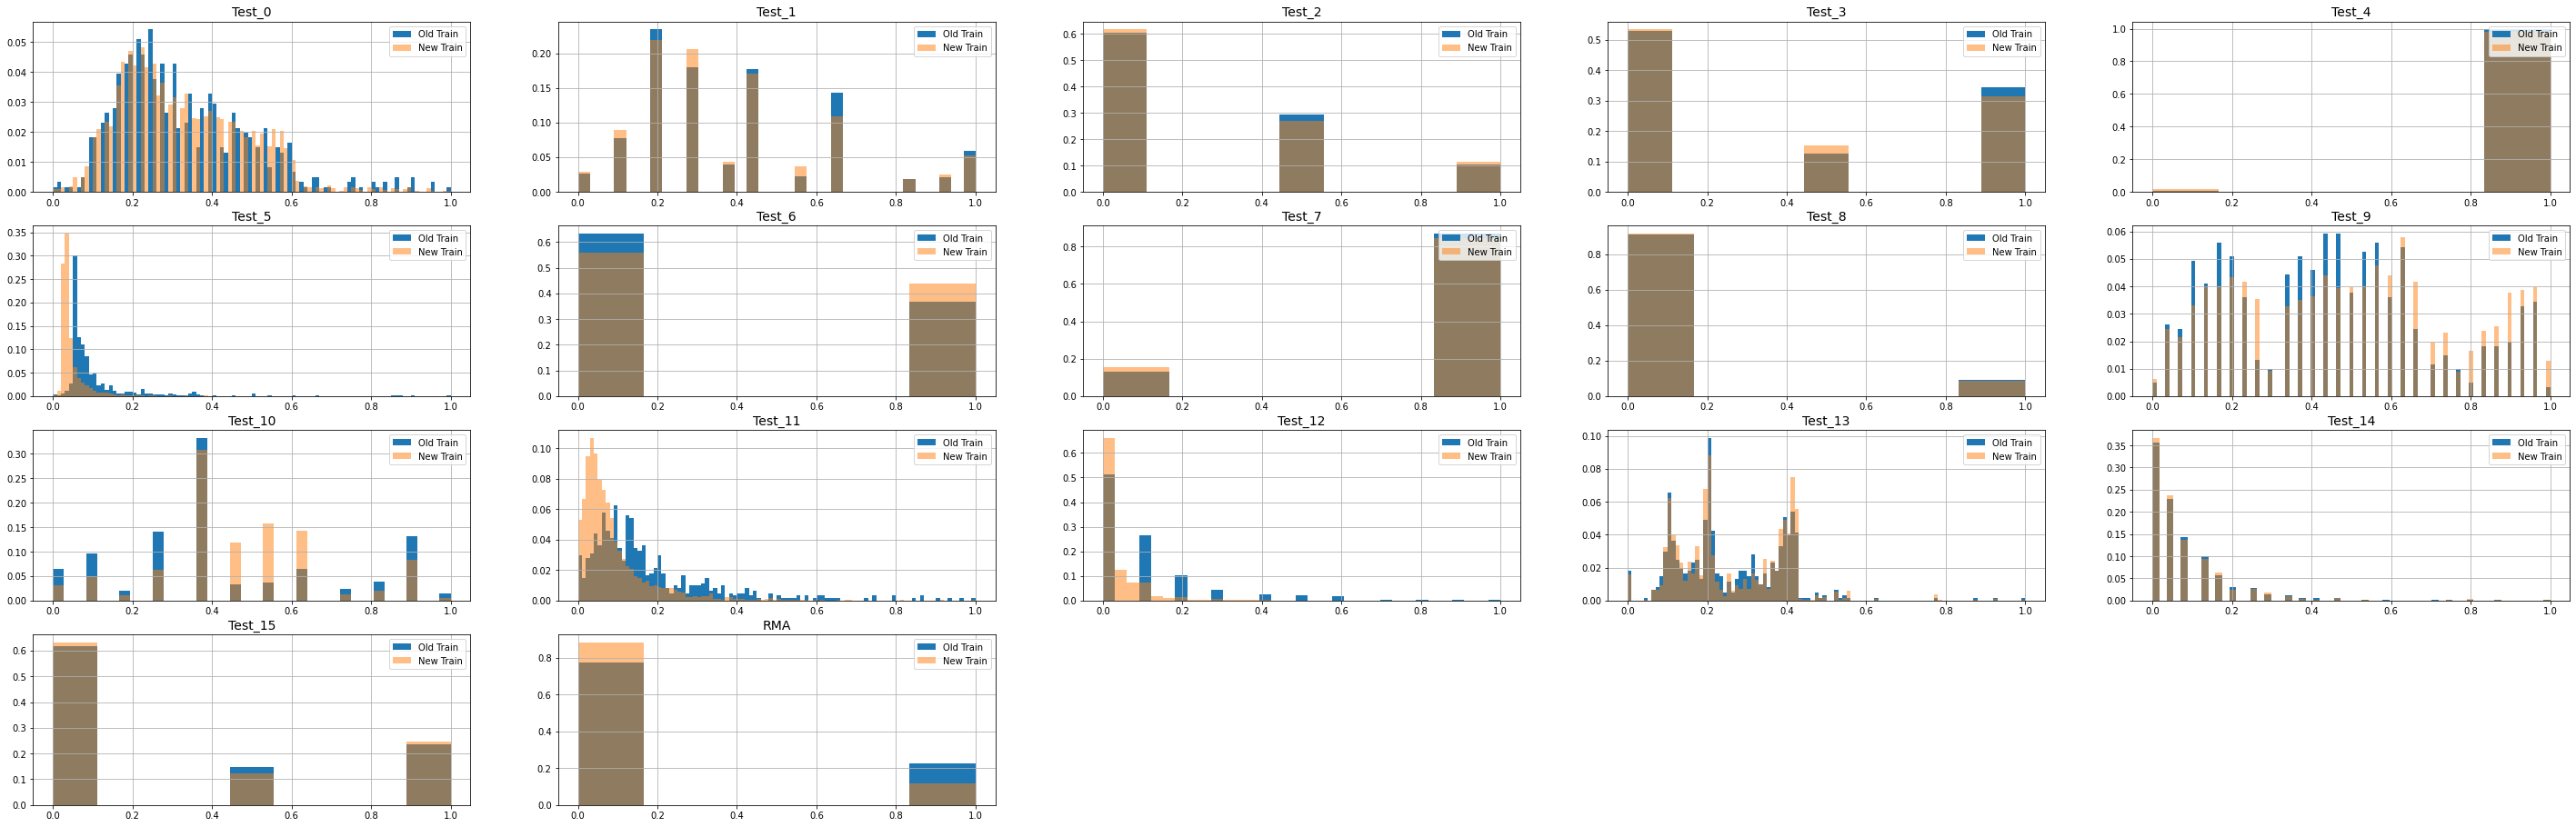

In [ ]:
plot_histograms_features([comparing_df, df_rma_train_preprocessed], text=['Old Train', 'New Train'], alpha=[1, 0.5])

We can see that we get similar distribution, but not equaly beacuse we want some variation to our data set for better model in test evaluation.
note that we have **imbalanced** data (**RMA** are the labels) and our fill is cause to more imbalancing and that can reduce our model performance. we can try other fill as many we like, i found this preprocess to get better results

#### 2.4 Scatter 2 dimentional features plots.

- **scatter_plot(df_X, df_y, labels_visualize, fig_size=(36, 22))** - generate Scattre plots between any 2 features in **labels_visualize**, if the length of **labels_visualize** is $m$ we have $\frac{m(m-1)}{2}$  different plots. 

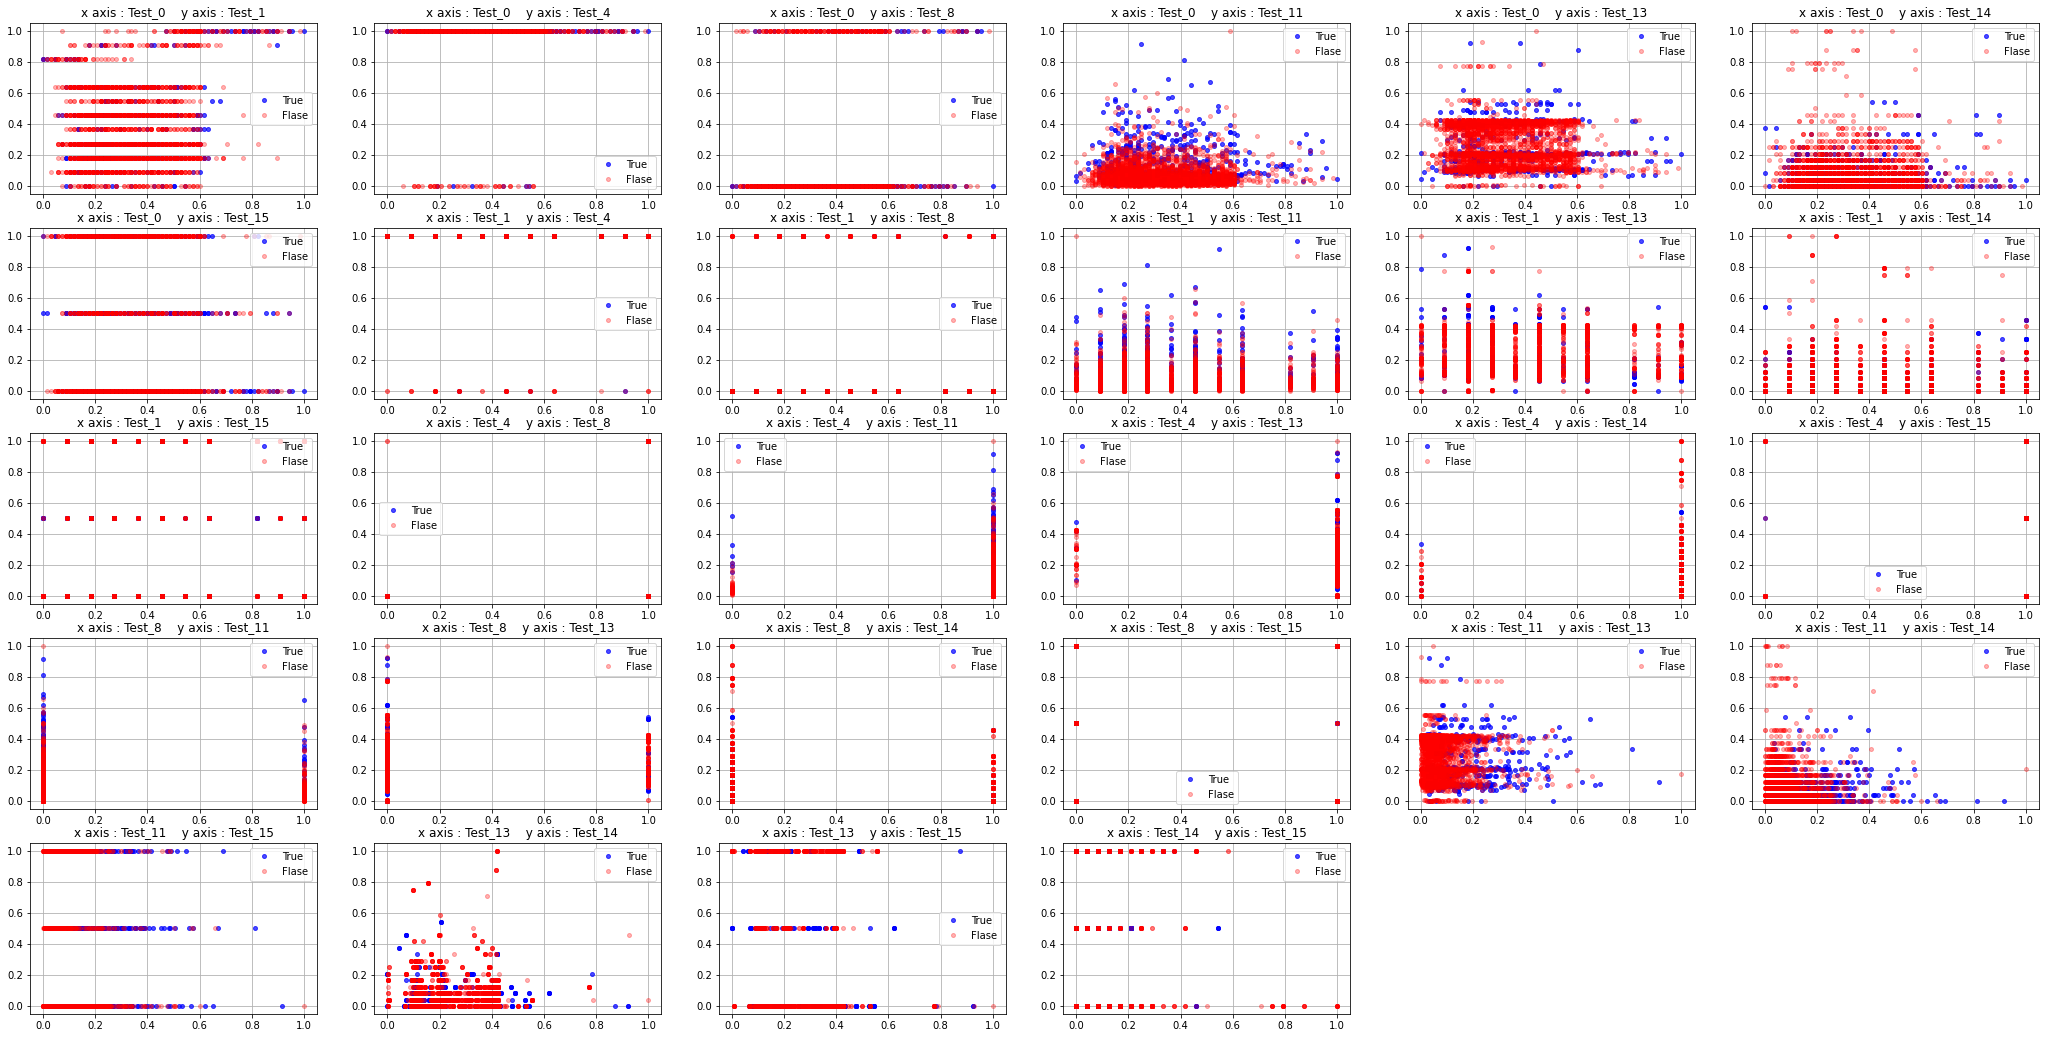

In [ ]:
def scatter_plot(df_X, df_y, features_visualize, fig_size=(36, 22)):
    num_of_graphs = len(features_visualize) * (len(features_visualize) - 1) / 2
    n_rows = int(np.ceil(num_of_graphs ** (1/2)))
    fig, ax = plt.subplots(n_rows, n_rows, figsize=fig_size)
    clean_axes(ax, n_rows, n_rows)
    labels = []
    for i, label_1 in enumerate(features_visualize):
        for label_2 in features_visualize[i+1:]:
            labels.append([label_1, label_2])
    
    clean_axes(ax, n_rows, n_rows)
    for i, labs in enumerate(labels):
        label_1, label_2 = labs
        df_X_True = df_X[df_y == 1]
        df_X_False = df_X[df_y == 0]
        r, c = int(i / n_rows), i % n_rows
        ax[r, c].set_visible(True)
        ax[r, c].plot(df_X_True[label_1].values, df_X_True[label_2].values, 'o', color='b', label='True', alpha=0.7, markersize=4)
        ax[r, c].plot(df_X_False[label_1].values, df_X_False[label_2].values, 'o', color='r', label='Flase', alpha=0.3, markersize=4)
        ax[r, c].set_title(f'x axis : {label_1}    y axis : {label_2}')
        ax[r, c].legend()
        ax[r, c].grid()
    plt.show()


features_visualise = ['Test_0', 'Test_1', 'Test_4', 'Test_8', 'Test_11', 'Test_13', 'Test_14', 'Test_15']

df_rma_features_preprocessed, df_rma_labels = split_features_labels(df_rma_train_preprocessed)
scatter_plot(df_rma_features_preprocessed, df_rma_labels, features_visualise)

Here we can se some interesting results for some graphs like **x axis Test_0 y axis Test_11** or **x axis Test_0 y axis Test_14** we see that the **True** labels are scatter between the **False** labels (like some noise) and that cause some problems in our predictions. on the other hand if we look on **x axis Test_0 y axis Test_8** or **x axis Test_0 y axis Test_15** we can see nice seperation between **True** and **False** labels, maby we can use in **linear regression** of **RandomForest** to get good results.

#### 2.5 Plot the correlation matrix after the pre-processing.

In [ ]:
df_rma_train_preprocessed.corr().style.background_gradient(cmap='coolwarm')

,Test_0,Test_1,Test_2,Test_3,Test_4,Test_5,Test_6,Test_7,Test_8,Test_9,Test_10,Test_11,Test_12,Test_13,Test_14,Test_15,RMA
Test_0,1.000000,0.257383,-0.130035,0.007984,0.014811,0.081823,0.189637,0.005672,0.187223,-0.013287,0.078913,-0.004954,-0.003104,-0.074289,-0.015161,-0.021715,0.054644
Test_1,0.257383,1.000000,-0.015328,-0.175179,-0.013063,0.045470,0.136874,-0.012281,0.076314,0.006108,0.025670,-0.017566,-0.036733,-0.081740,0.020894,0.031751,0.055281
Test_2,-0.130035,-0.015328,1.000000,0.030611,-0.055628,-0.035353,0.027322,0.007276,-0.023224,-0.001516,-0.021999,0.032355,-0.026522,0.044043,0.033071,0.029687,0.060542
Test_3,0.007984,-0.175179,0.030611,1.000000,0.029294,0.085836,0.106865,0.051346,-0.023401,0.006095,0.079861,-0.023817,0.014155,-0.072408,0.039685,-0.025147,0.043752
Test_4,0.014811,-0.013063,-0.055628,0.029294,1.000000,0.068241,0.008545,0.053202,0.023659,0.007820,-0.010271,0.011968,0.006570,-0.032362,-0.027110,-0.014336,0.006852
Test_5,0.081823,0.045470,-0.035353,0.085836,0.068241,1.000000,0.045043,0.070272,0.033904,-0.004385,0.092379,-0.012944,0.002858,-0.056870,0.014182,-0.001979,0.008348
Test_6,0.189637,0.136874,0.027322,0.106865,0.008545,0.045043,1.000000,0.030939,0.043050,0.020687,0.184172,-0.015333,-0.008357,-0.314749,0.049858,0.072630,0.096261
Test_7,0.005672,-0.012281,0.007276,0.051346,0.053202,0.070272,0.030939,1.000000,0.021519,0.017318,-0.038869,0.011232,-0.004507,0.036196,-0.040474,0.106775,0.067987
Test_8,0.187223,0.076314,-0.023224,-0.023401,0.023659,0.033904,0.043050,0.021519,1.000000,0.024772,-0.014540,-0.031180,0.030078,-0.037833,0.103509,-0.016160,0.007266
Test_9,-0.013287,0.006108,-0.001516,0.006095,0.007820,-0.004385,0.020687,0.017318,0.024772,1.000000,0.086065,-0.018218,0.165634,-0.124971,-0.022855,0.094478,-0.006770


Note that now we dont have high correlation between **Test_13** and **Test_14** which can אhat could have made it difficult for the model to anlyze the data.

# Build a ML/DL model

Build any model/s you find useful to solve the task and evaluate its performance results.

Use the metric f1_score imported above to measure the performance of your model. (positive class is RMA unit (RMA = True))

It is recommended to try different models and techniques and compare the results

- Outcome of this phase can be but not limited to:

  -	Train model/s on data set you prepared in previous phase
  -	Features engineering
  -	Features selection
  -	Hyper-parameters optimization
  -	Model/s results evaluation including performance metric value


**Goal of this phase is to see your machine learning experimentation skills toward achieving as best model/s as you can**

#### 3.1 Store the train, test after preprocessing

- ***def expand(X)*** - add column of ones for create bigger data which can improve our restuls.

- ***train_test_split(df_rma_features_preprocessed.values, df_rma_labels.values, test_size=0.2, random_state=42)*** - split our data set into train and validation dataset for evaluating our model performance with ratio **test_size** to the validation and 1 - **test_size** for train.

In [ ]:
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=10, suppress=True)

def expand(X):
    return np.c_[X, np.ones(shape=(X.shape[0], 1))]

X_train, X_eval, y_train, y_eval = train_test_split(df_rma_features_preprocessed.values, df_rma_labels.values, test_size=0.2, random_state=42)
X_test_model = df_rma_test_preprocessed.values

# delete_cols = [13, 14, 15]
# X_train = np.delete(X_train, delete_cols, 1)
# X_eval = np.delete(X_eval, delete_cols, 1)
X_train, X_eval, X_test_model = expand(X_train), expand(X_eval), expand(X_test_model)


print(f'Train      : {X_train.shape}')
print(f'Evaluation : {X_eval.shape}')
print(f'Test       : {X_test_model.shape}')

Train      : (2892, 17)
Evaluation : (724, 17)
Test       : (905, 17)


#### 3.2 create classifiers.

- **predict_by_distance(X_train, y_train, X_eval, y_eval, orders, verbose=True)** - use the simplest classifier witout leanable paremeters which for each sample in **X_eval** we search for the closet sample in **X_train** (in term of $L_p$ norm where **ord** = $p$) and dicided their label. the formula is :
\begin{equation}
y_\text{eval} = y_\text{train} \left( \text{argmin}_{x \in X_\text{train}} \| x - x_\text{eval} \|_p \right)
\end{equation}

> We search over different values of **ord** to find the best evaluation in terms of **f1 score**.

- **linear_model(X_train, y_train, X_eval, y_eval, epsilons, thresholds, lamdas=[0], verbose=True)** - Assume a linear model $h(\theta) = X \theta$ where we found analiticly the local minimum of the loss $\frac{1}{n} \|X \theta - y \|_2^2 + \frac{λ}{2} \| \theta \|_2^2$ but for avid over fitting we give close solution in distance of $\varepsilon$ to avoid overfitting, thus for $X \in \mathbb{R}^{n \times d}$ we get :
\begin{equation}
\theta^{\star} = \left(X^T X + NλI_d \right)^{-1} \left( X^T y +  \frac{\varepsilon}{\sqrt{d}} 1_d \right)
\end{equation}

> in the test we define by some threshold, if $x \theta < thr $ then we decide **False**, otherwise we decide **True** we search over different values of $\varepsilon$ and $thr$ to find the best evaluation in terms of **f1 score**.

- **classifier_model(X_train, y_train, X_eval, cv, classifer, param_grid, verbose=True)** - use with some classifier in **sklearn** library, for example we use in RandomForest, MPLC, SVC and KNN.


- **make_classifer_grid(algo = 'MLPClassifier')** - create "grid" which is some hyper parameters (in dectionary) for tryin all the possible and find the best setups for evaluation our data.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold


def predict_by_distance(X_train, y_train, X_eval, y_eval, orders, verbose=True):
    max_metrica = -1
    y_best_pred = None
    for ORD in orders:
        y_pred =  np.array([y_train[np.argmin(np.linalg.norm(X_train - np.ones(shape=(X_train.shape[0], 1)) @ z_eval[None, :], ord=ORD, axis=1))] for z_eval in X_eval])
        metrica_val = f1_score(y_eval, y_pred)
        if metrica_val > max_metrica:
            max_metrica = metrica_val
            y_best_pred = y_pred
            best_params_ = {'order': ORD}
    if verbose:
        print(f'best parameters for grid serch: {best_params_}\n')
    return y_best_pred, best_params_


def linear_model(X_train, y_train, X_eval, y_eval, epsilons, thresholds, lamdas=[0], verbose=True):
    max_metrica = -1
    y_best_pred = None
    for lam in lamdas:
        for THR in thresholds:
            for eps in epsilons:
                parameters = (np.linalg.inv(X_train.T @ X_train + lam * X_train.shape[0] * np.eye(X_train.shape[1])) @ (X_train.T @ y_train + eps / np.sqrt(X_train.shape[1])))[:, None]
                y_pred = np.where(X_eval @ parameters < THR, 0, 1)[:, 0]
                metrica_val = f1_score(y_eval, y_pred)
                if metrica_val > max_metrica:
                    max_metrica = metrica_val
                    y_best_pred = y_pred
                    best_params_ = {'parameters': parameters.T, 'thresh': THR, 'eps': eps}
                    # print(f'epsilon : {eps:<5.4f}, thr = {THR:<5.4f} , f1_score = {max_metrica:.10f}')
    if verbose:
        print(f'best parameters for grid serch: {best_params_}\n')
    return y_best_pred, best_params_


def classifier_model(X_train, y_train, X_eval, cv, classifer, param_grid, verbose=True):
    grid = GridSearchCV(classifer, param_grid, n_jobs=-1, cv=cv)
    grid.fit(X_train, y_train)
    y_pred = grid.predict(X_eval)
    best_pars = {'grid': grid, 'classifer': classifer, 'best_setups': grid.best_params_}
    if verbose:
        print(f'best parameters for grid search : {grid.best_params_}\n')
    return y_pred, best_pars

def make_classifer_grid(algo = 'MLPClassifier'):
    if algo == 'Distance':
        classifer = None
        param_grid = {
            'orders': [1, 2, 3, 4, float('inf')]
        }
    elif algo == 'Linear':
        classifer = None
        param_grid = {
            'lamdas': [0],
            'epsilons': np.linspace(start=-2, stop=0, num=50),
            'thresholds': np.linspace(start=0, stop=1, num=50)
        }
    elif algo == 'MLPClassifier':
        classifer = MLPClassifier() 
        param_grid = {
            'hidden_layer_sizes': [(64,32), (128,64, 32)],
            'max_iter': [500],
            'activation': ['relu'],
            'solver': ['adam'],
            'alpha': [0.05, 0.01],
            'learning_rate': ['adaptive'],
            'tol' : [0.0000001] #tolerance for early stopping
        }
    elif algo == 'RandomForestClassifier':
        classifer = RandomForestClassifier()
        param_grid = { 
                'n_estimators': [100, 150, 200],
                'max_features': ['sqrt', 'log2', 'auto'],
                'max_depth' : [512, 1024],
                'criterion' :['gini', 'entropy']
        }
    elif algo == 'SVC':
        classifer = SVC()
        param_grid = {'C': [0.1, 1, 100],
              'gamma': [1, 0.01, 0.0001],
              'kernel': ['rbf']}
    elif algo == 'KNN':
        classifer = KNeighborsClassifier()
        k_range = list(range(1, 5))
        param_grid = dict(n_neighbors=k_range)
    return classifer, param_grid

#### 3.3 Train our model and evaluate the results.

- **evaluate_statistics(y_true, y_pred)** - calculate the accuracy, precision, recall and f1 score by ass follow : 

\begin{equation}
accuracy = \frac{TP + TN}{TP + TN + FP + FN} \quad precision = \frac{TP}{TP + FP}
\end{equation}

\begin{equation}
recall = \frac{TP}{TP + FN} \quad F_1 = \frac{2 * precision * recall}{precision * recall} = \frac{2TP}{2TP + FP + FN}
\end{equation}

- **print_record(stats, algoritmns, stats_names)** - for each metric print from the best to the wort model only in the (specific metric).

- **train_model(X_train, y_train, X_eval, y_eval, algoritms, cv=3, best_idx=-1)** - Train our model and save the one with the best metric base on the index **best_idx** of the list $[accuracy, precision, recall, F_1]$, note that $-1$ is the last index which correspond to $F_1$ score.



In [ ]:
def evaluate_statistics(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f_1 = f1_score(y_true, y_pred)
    return [acc, prec, recall, f_1]

def print_record(stats, algoritmns, stats_names):
    statistics_T = np.array(stats).T
    for row, stat in zip(statistics_T, stats_names):
        print(f'Sorted by {stat}.')
        idx = np.argsort(row)[::-1]
        for i, r_i in enumerate(idx):
            print(f'{i + 1}) {algoritmns[r_i]:<10}, {stat} : {row[r_i]:.8f}')
        print('\n')

def train_model(X_train, y_train, X_eval, y_eval, algoritms, cv=3, best_idx=-1):
    algoritms = algoritms if isinstance(algoritms, list) else [algoritms]
    best_results = None
    best_score = -1
    y_predictions, statistics = [], []
    print(f'Start training...')
    for algo in algoritms:
        print(f'Train with {algo} algorithm...')
        classifer, param_grid = make_classifer_grid(algo=algo)
        if algo == 'Distance':
            y_pred, params = predict_by_distance(X_train, y_train, X_eval, y_eval, **param_grid)
        elif algo == 'Linear':
            y_pred, params = linear_model(X_train, y_train, X_eval, y_eval, **param_grid)
        elif algo in ['MLPClassifier', 'RandomForestClassifier', 'SVC', 'KNN']:
            y_pred, params = classifier_model(X_train, y_train, X_eval, cv, classifer, param_grid)
        else:
            continue

        stats = evaluate_statistics(y_eval, y_pred)
        y_predictions.append(y_pred)
        statistics.append(stats)

        if stats[best_idx] > best_score:
            best_score = stats[best_idx]
            best_results = params
            best_results['algoritm'] = algo

    print(f'End training.\n')
    return y_predictions, statistics, best_results


algoritms = ['Distance', 'Linear', 'RandomForestClassifier', 'MLPClassifier', 'SVC']
statistic_names = ['accuracy', 'precision', 'recall', 'f_1 score']

y_predictions, statistics, best_params_grid = train_model(X_train, y_train, X_eval, y_eval, algoritms, cv=3)
print_record(statistics, algoritms, statistic_names)

Start training...
Train with Distance algorithm...
best parameters for grid serch: {'order': 1}

Train with Linear algorithm...
best parameters for grid serch: {'parameters': array([[ 0.0697786671,  0.0768933092,  0.0477559602,  0.02672493  ,
        -0.0019798876, -0.062855494 ,  0.0446689779,  0.0482736272,
         0.0169056749, -0.002844383 ,  0.0187699387,  1.3939873865,
        -0.1828430364, -0.0595995275,  0.021075131 ,  0.0563252257,
        -0.13891016  ]]), 'thresh': 0.18367346938775508, 'eps': -2.0}

Train with RandomForestClassifier algorithm...
best parameters for grid search : {'criterion': 'entropy', 'max_depth': 1024, 'max_features': 'auto', 'n_estimators': 100}

Train with MLPClassifier algorithm...
best parameters for grid search : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam', 'tol': 1e-07}

Train with SVC algorithm...
best parameters for grid search : {'C': 100, 'gamma': 1, 

We can see that **MLPClassifier** give as the best performance in terms of $F_1$ score, note that also the **Distance** model (with $L_1$ norm) is also very good and also very simple while relay only in distances (we get nice results because the seperation in the **scatter plot** of some of the features).

# Model Interpretation

**Here is the place to interpret your model**

- Outcome of this phase can be but not limited to:

    - Confusion Matrix
    - Features Importance
    - Business Insights

**Goal of this phase is to interpret your best model/s you found in previous phase** 

#### 4.1 Plot $F_\beta$ score and confusion matrix.

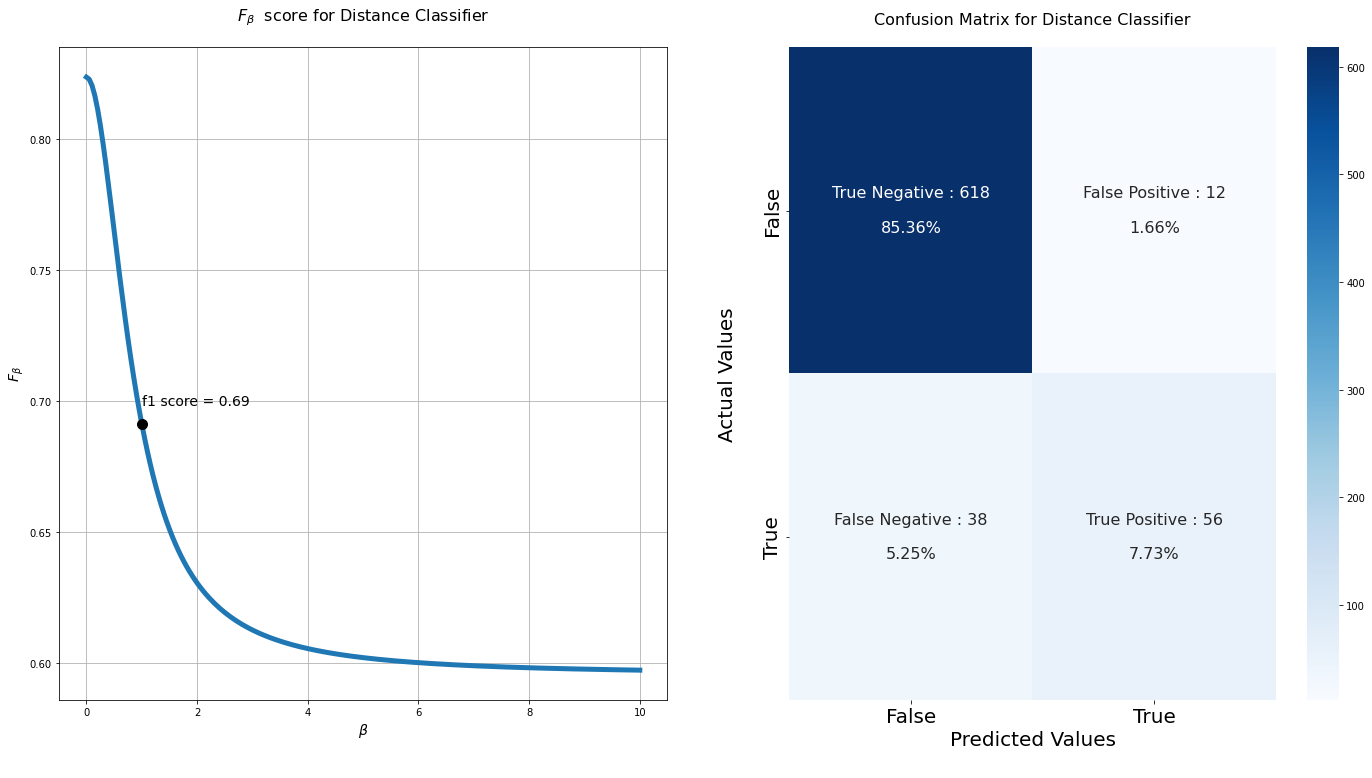

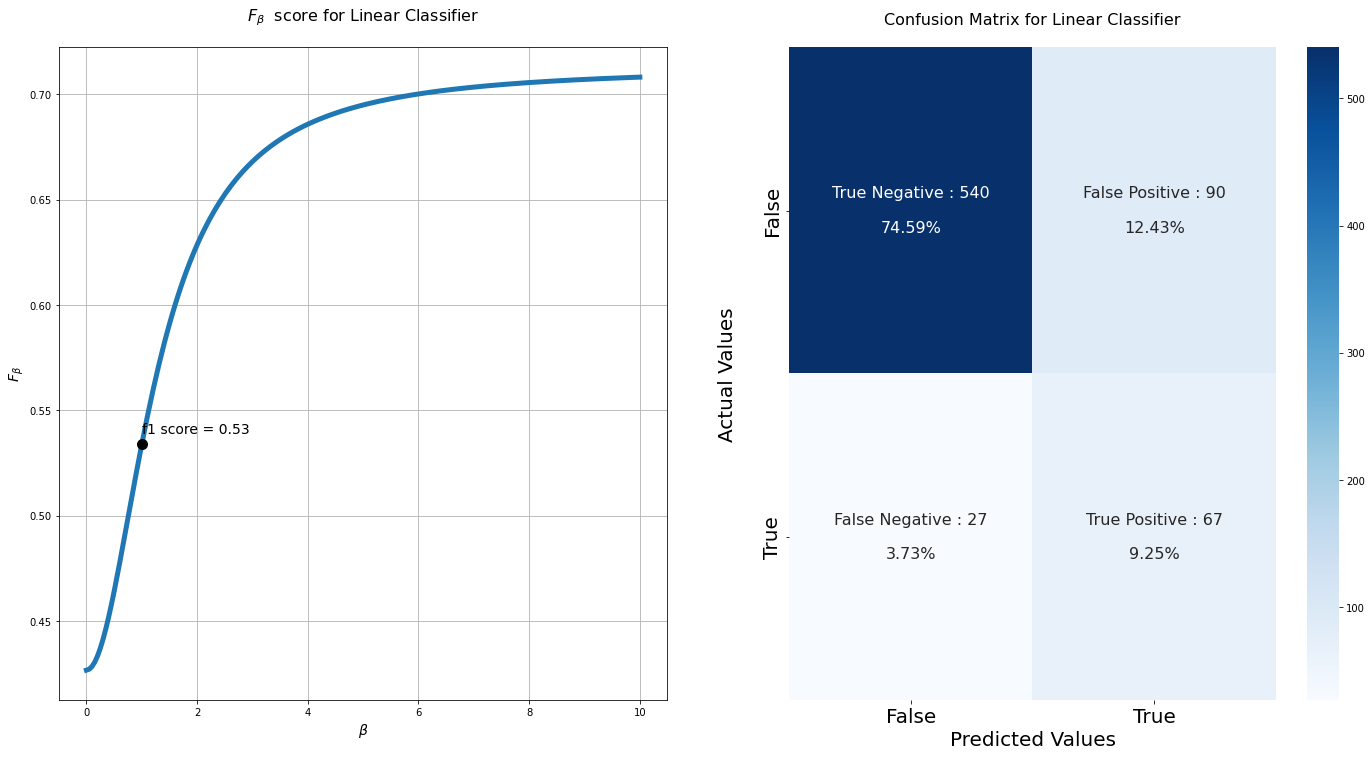

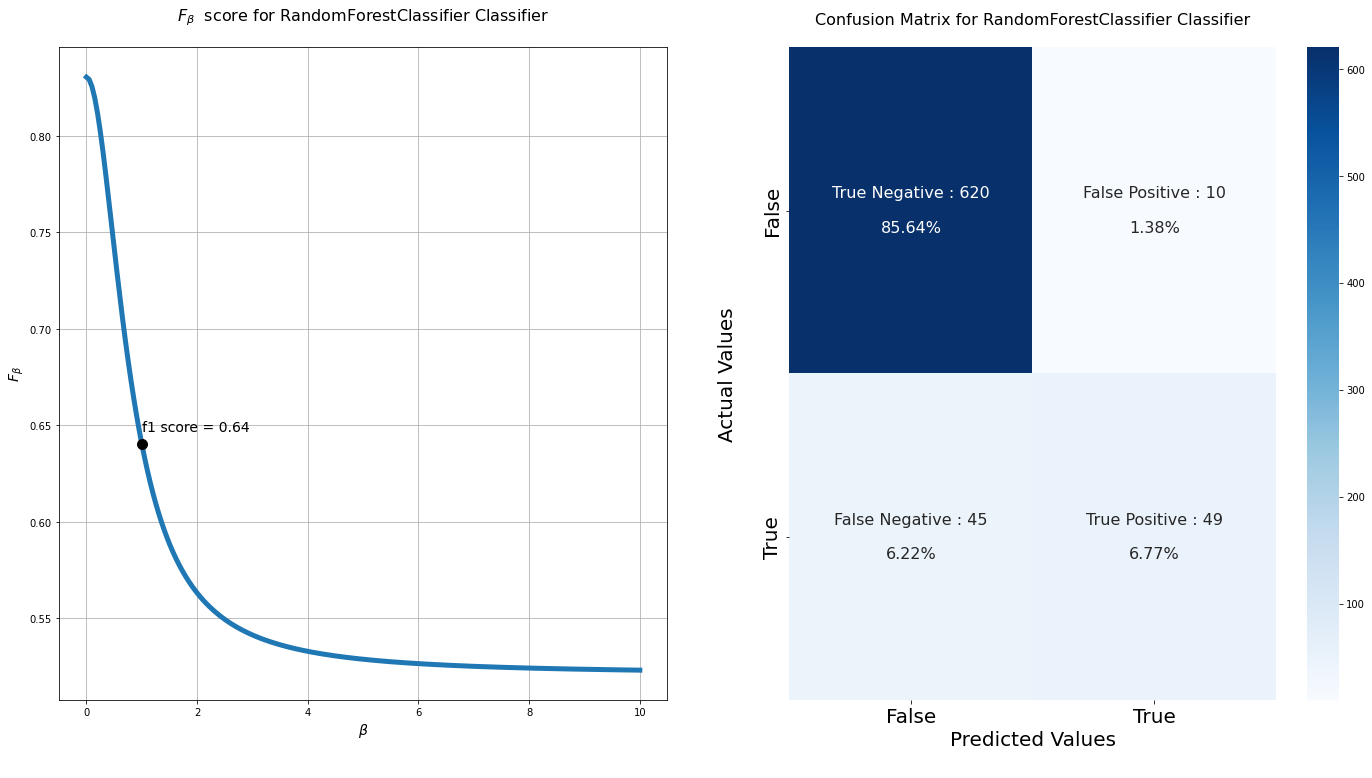

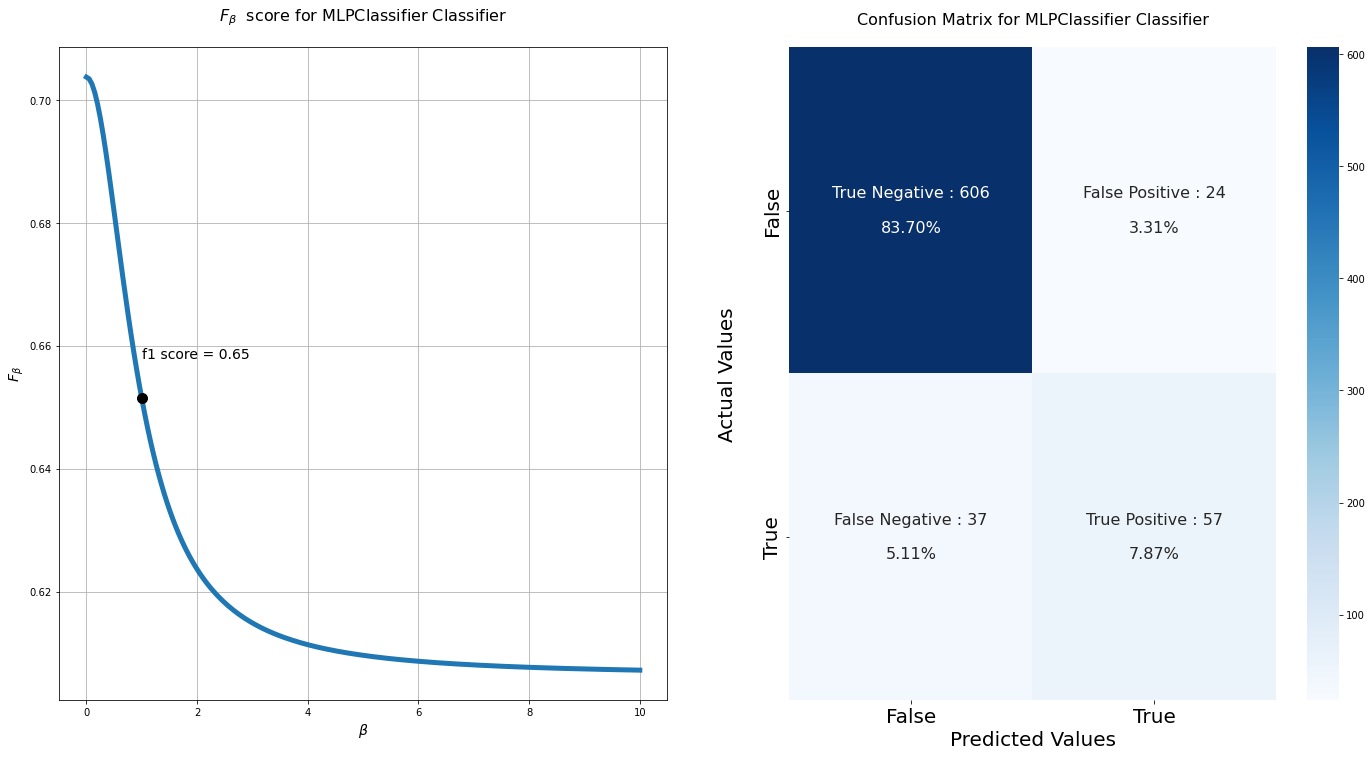

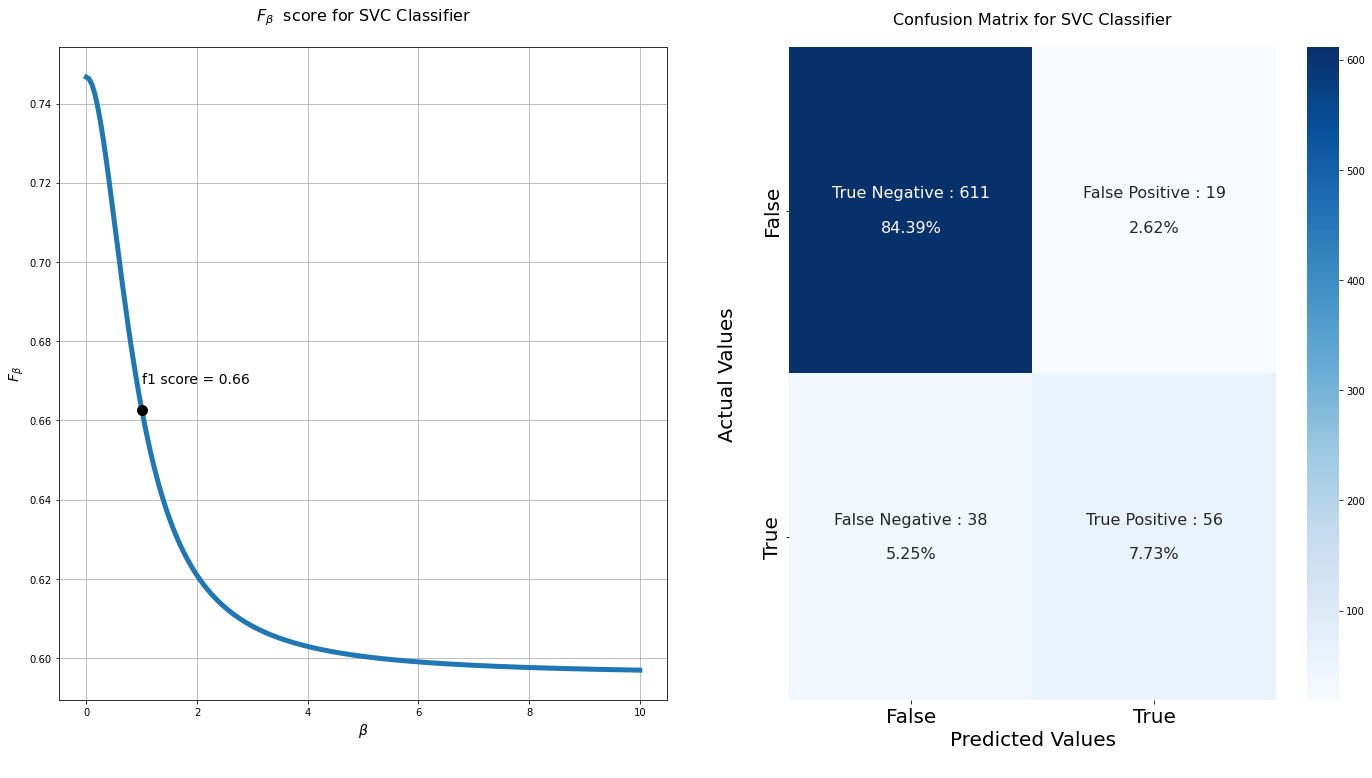

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_results(y_eval, y_preds, algoritms, fig_size=(12, 12)):
    y_preds = y_preds if isinstance(y_preds, list) else [y_preds]
    beta_vector = np.linspace(start=0, stop=10, num=200)
    for y_pred, algo in zip(y_preds, algoritms):
        f_beta = []
        for beta in beta_vector:
            f_beta.append(fbeta_score(y_eval, y_pred, beta=beta))

        f1_score = fbeta_score(y_eval, y_pred, beta=1)
        conf_matrix = confusion_matrix(y_eval, y_pred, labels=[0, 1])
        fig, ax = plt.subplots(1, 2, figsize=fig_size)

        ax[0].plot(beta_vector, f_beta, lw=5)
        ax[0].plot(1, f1_score, 'o', color='k', ms=10)
        ax[0].text(1, f1_score*1.01, f'f1 score = {f1_score:.2f}', fontsize=14)
        ax[0].set_xlabel(r'$\beta$', fontsize=14)
        ax[0].set_ylabel(r'$F_{\beta}$', fontsize=14)
        ax[0].set_title(r'$F_{\beta}$' + f'  score for {algo} Classifier\n', fontsize=16)
        ax[0].grid()

        group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
        group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
        group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
        labels = np.asarray([f"{v1} : {v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]).reshape(2,2)
        sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16}, ax=ax[1])
        ax[1].set_title(f'Confusion Matrix for {algo} Classifier\n', fontsize=16);
        ax[1].set_xlabel('Predicted Values\n', fontsize=20)
        ax[1].set_ylabel('Actual Values\n', fontsize=20);
        ax[1].xaxis.set_ticklabels(['False','True'])
        ax[1].yaxis.set_ticklabels(['False','True'])
        ax[1].tick_params(axis='both', labelsize=20)
        plt.show()

plot_results(y_eval, y_predictions, algoritms, fig_size=(24, 12))

# Something to think about:

- Why f1_score is the selected metric?
- Are there metrics that you think would better suit this Use-Case?
- What metrics are not appropriate for such a Use-Case?

#### 5.1 Answer to question 1 :

- In this case f1_score is the seleted metric because we are dealing with **imbalance datset**.
 lets count the number of **False** and **True** labels.

In [ ]:
print(f'Number of True  samples :  {(df_rma_labels == 1).sum()} / {df_rma_labels.shape[0]} ({100 * (df_rma_labels == 1).sum() / df_rma_labels.shape[0]:.2f} %)')
print(f'Number of False samples : {(df_rma_labels == 0).sum()} / {df_rma_labels.shape[0]} ({100 * (df_rma_labels == 0).sum() / df_rma_labels.shape[0]:.2f} %)')

Number of True  samples :  430 / 3616 (11.89 %)
Number of False samples : 3186 / 3616 (88.11 %)


We can see that whe have 88.11 % samples with **False** label, This means that you could get 88.11 % accuracy by simply predicting the negative class all the time. note that the formula of f1 score is $F_1 = \frac{TP}{TP + \frac{1}{2}(FP + FN)}$. thus for dataset with majority of **False** labels $TP$  will ba smaller and thus the metric sensitive for minor changs in $FN$ or $FP$

#### 5.2 Answer to question 2 :

-  In my opinion the f1 score is the best metric for this case becase we tאaking into account the instability of our dataset. we can in general crate a reward matrix $C \in \mathbb{R}^{K \times K}$ where $K$ is the number of labels (in our case $K=2$) and $C_{ij}$ is the reward valse if we predict label $i$ and the actual label is $j$. denote $C_{\text{min}}=\text{min}_{i,j} \{C_{ij} \}$ and $C_{\text{max}}=\text{max}_{i,j} \{C_{ij} \}$ and $\hat{y} = (\hat{y}_1,..,\hat{y}_n)^T \in \{1,2,...,K\}^n$ be the predicted values and $y = (y_1,..,y_n)^T \in \{1,2,...,K\}^n$ be the actual values we get the cost value as follows :

\begin{equation}
L(\hat{y},y) = \frac{1}{n} \sum_{i=1}^n \frac{C_{\hat{y}_i y_i} - C_{\text{min}}}{C_{\text{max}} - C_{\text{min}}} \;,  \qquad ,L(\hat{y},y) \in [0,1]
\end{equation}

We can implemet in in simple function :

In [ ]:
def costume_accuracy(y_eval, y_predictions, Cost_matrix=np.matrix([[1, 0], [0, 1]])):
    y_predictions = y_predictions if isinstance(y_predictions, list) else [y_predictions]
    Cost_matrix = (Cost_matrix - Cost_matrix.min().min()) / (Cost_matrix.max().max() - Cost_matrix.min().min())
    loss = []
    for y_pred in y_predictions:
        total = 0
        for val_hat, val_true in zip(y_eval, y_pred):
            total += Cost_matrix[val_hat, val_true]
        loss.append(total / len(y_eval))
    return loss

for alg, L in zip(algoritms, costume_accuracy(y_eval, y_predictions)):
    print(f'{alg} costume accuracy : {L:.4f}')

Distance costume accuracy : 0.6914
Linear costume accuracy : 0.7390
RandomForestClassifier costume accuracy : 0.6809
MLPClassifier costume accuracy : 0.6978
SVC costume accuracy : 0.6943


> also we can use in $F_\beta$ score where we $\beta$ is chosen such that recall is considered $\beta$ times as important as precision by the formula

\begin{equation}
F_\beta = \frac{(1 + \beta_2) * precission * recall}{\beta ^2 * precission + recall}
\end{equation}
> and the value of $\beta$ can choose by the organization.

#### 5.3 Answer to question 3 :

- First, we can see in our result that the **accuracy** is not enough to evaluate the model because we have imbalanced data and we can get high accuracy (88%) for predicting the negative class all the time. the **precision** metric is not enough to evaluate the model because it relies only on the decision of predicting the label as **True** and we ignore most of the labels. the **recall** metric is not enough to evaluate the model because its relies only the decision of the actual label as **True**.

# Predict on the test-set and export the model

From our traning we get the pamareters of our best model
whice are the dictionary : {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam', 'tol': 1e-07}

#### 6.1 Create class to predict the result and save our model.

- **__init__(self, X_train, y_train, params_grid)** - create new instance of **My_model** where **params_grid** are the parameter of the best model (in terms of $F_1$ score) and **X_train, y_train** used only to the **Dustance** classsifier which depend on the training data.

- **distance_prediction(self, X, order)** - find perdiction for test data $X$ by distances.
- **linear_prediction(X_test, parameters, THR)** - find perdiction for test data $X$ by linear model with parameters **parameters**.

- **predict(self, X_test)** - generate prediction for test data $X_\text{test}$.

In [ ]:
class My_model:
    def __init__(self, X_train, y_train, params_grid):
        self.X_train = X_train
        self.y_train = y_train
        self.best_params_grid = params_grid

    def distance_prediction(self, X, order):
        return np.array([self.y_train[np.argmin(np.linalg.norm(self.X_train - np.ones(shape=(self.X_train.shape[0], 1)) @ z_test[None, :], ord=order, axis=1))] for z_test in X])

    @staticmethod
    def linear_prediction(X, parameters, THR):
        return np.where(X @ parameters < THR, 0, 1)[:, 0]

    def predict(self, X_test):
        algoritm = self.best_params_grid['algoritm']
        if algoritm == 'Distance':
            order = self.best_params_grid['order']
            y_pred = self.distance_prediction(X_test, order)
        elif algoritm == 'Linear':
            parameters = self.best_params_grid['parameters'].T
            THR = self.best_params_grid['thresh']
            y_pred = self.linear_prediction(X_test, parameters, THR)
        elif algoritm in ['MLPClassifier', 'RandomForestClassifier', 'SVC', 'KNN']:
            grid = self.best_params_grid['grid']
            y_pred = grid.predict(X_test)
        else:
            return None
        return pd.DataFrame(y_pred.astype(bool))

#### 6.2 Test our model.

Create **My_model** instance and predict the proprecced test data with **My_model.presict(X_test)**, store our object in **.pkl** file and the prediction in **'my_prediction.csv'** file.

In [ ]:
my_model = My_model(X_train, y_train, best_params_grid)

my_prediction = my_model.predict(X_test_model)
my_prediction.to_csv('my_prediction.csv', index = False)
with open('my_model.pkl', 'wb') as f:
    pickle.dump(my_model, f)

**Well done!!**

Congratulations!!! You are almost done. Please,pack your notebook, model and prediction file in one zip file and send us back through the e-mail which you received the assignment from.

## 7 Write all methods in one class.

In [2]:
from copy import deepcopy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import sklearn
from sklearn import preprocessing

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, fbeta_score, confusion_matrix, make_scorer

np.random.seed(seed=1)
np.set_printoptions(precision=10, suppress=True)

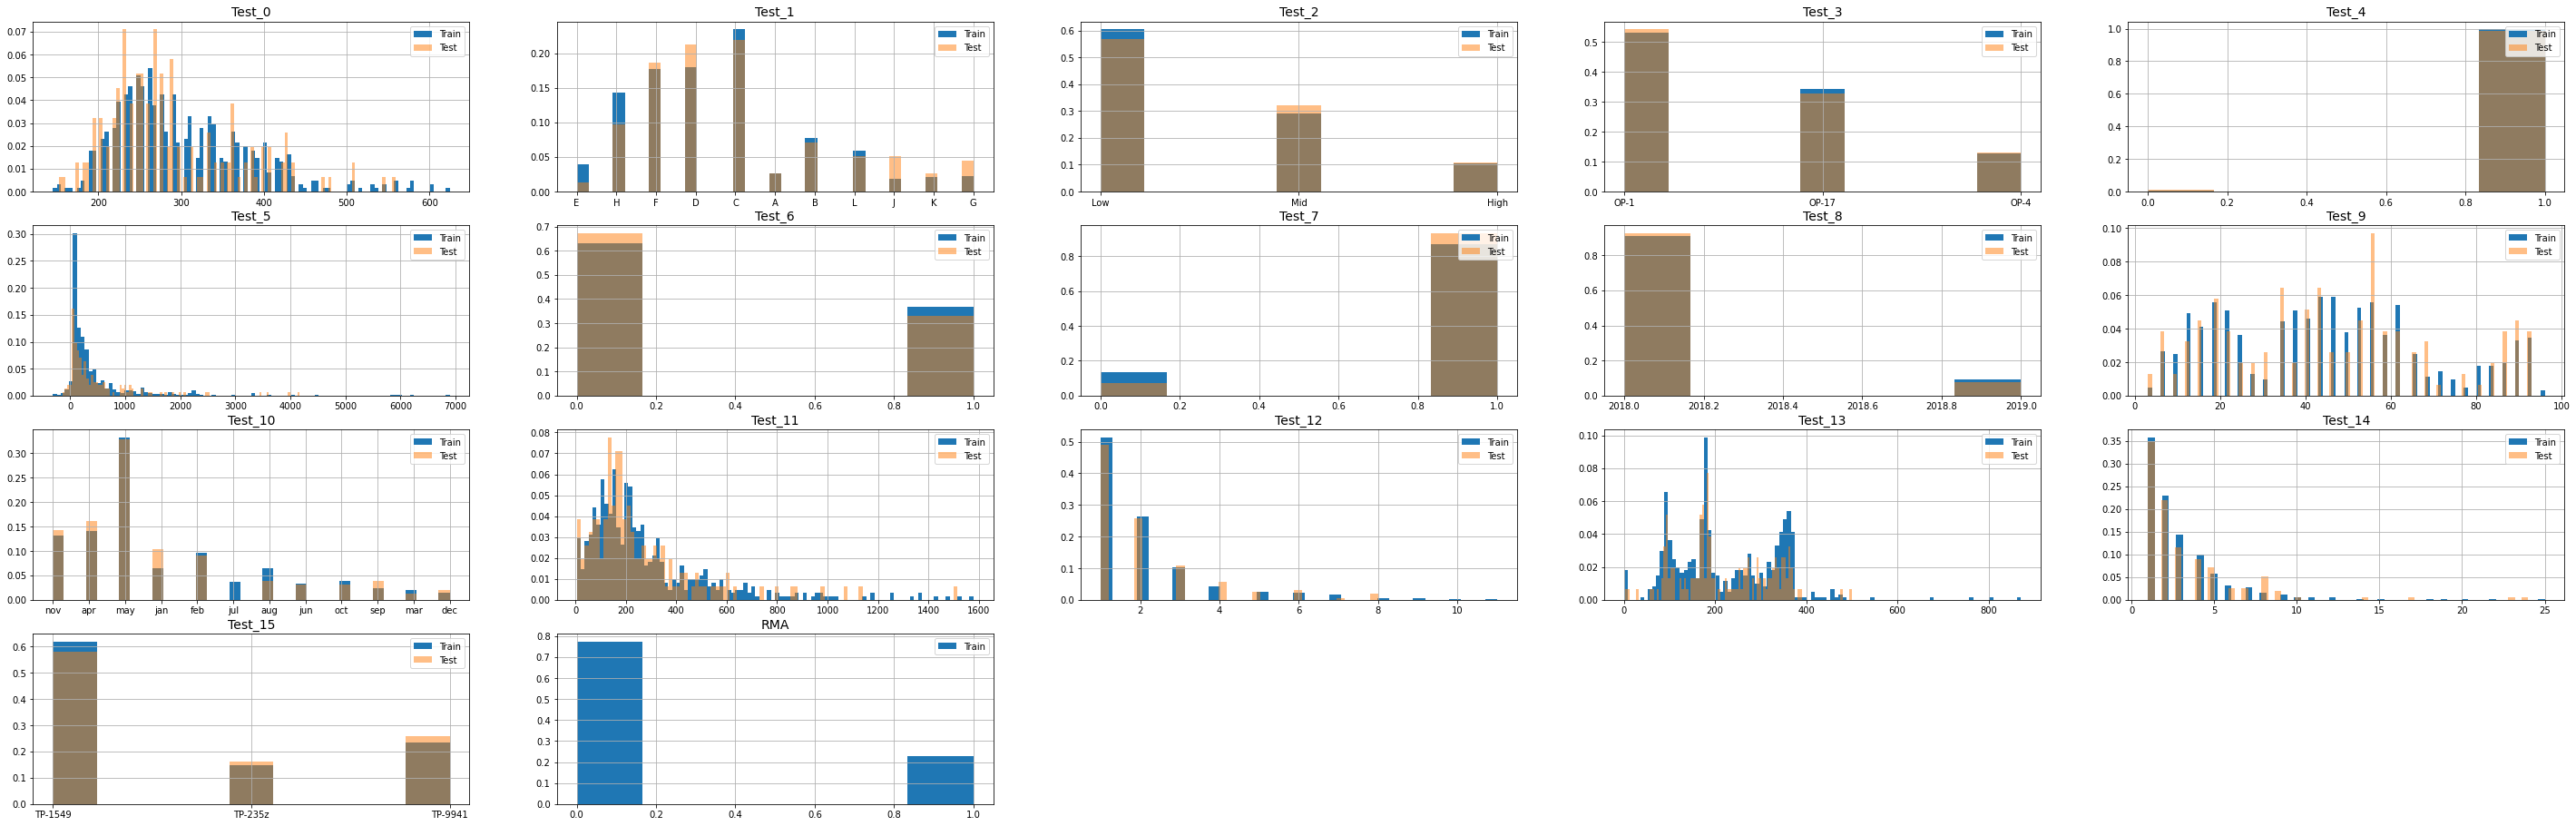

Start preprecessing...
End preprecessing.


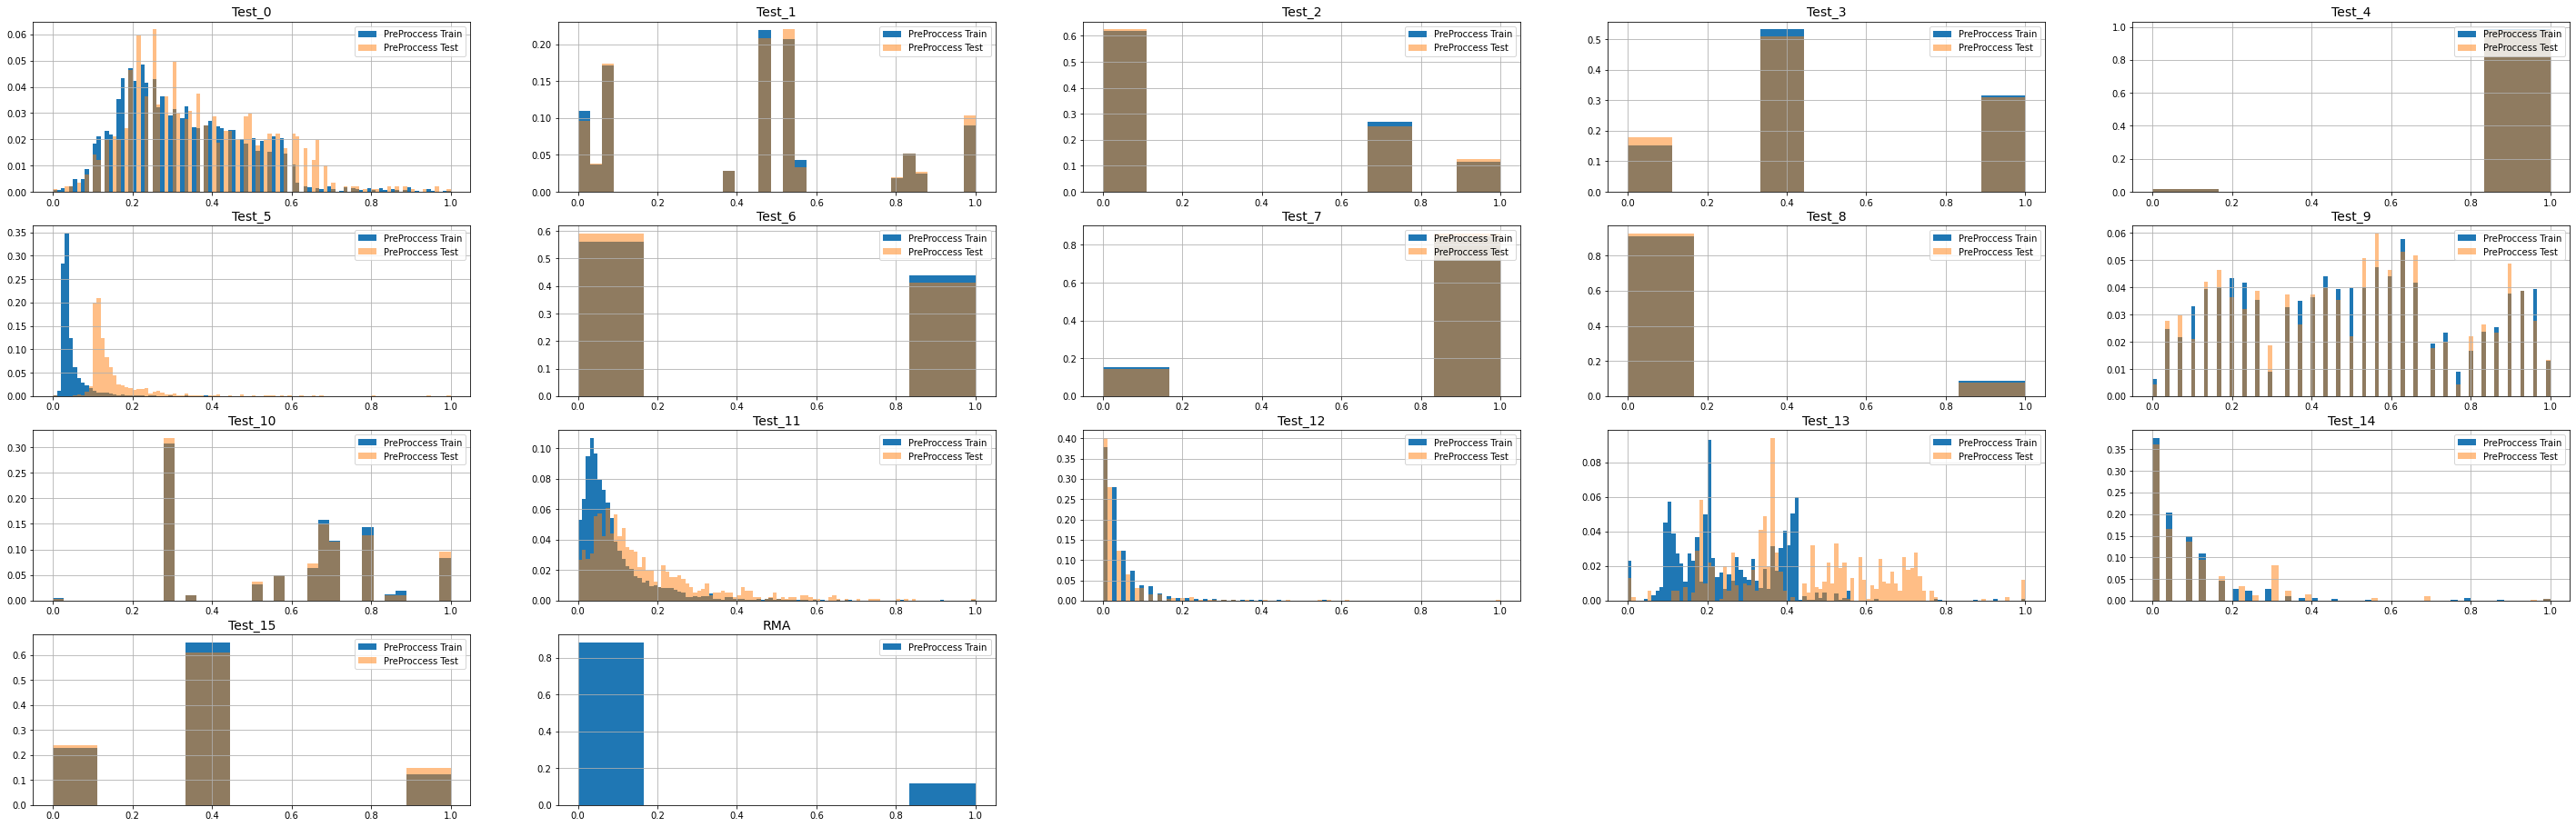

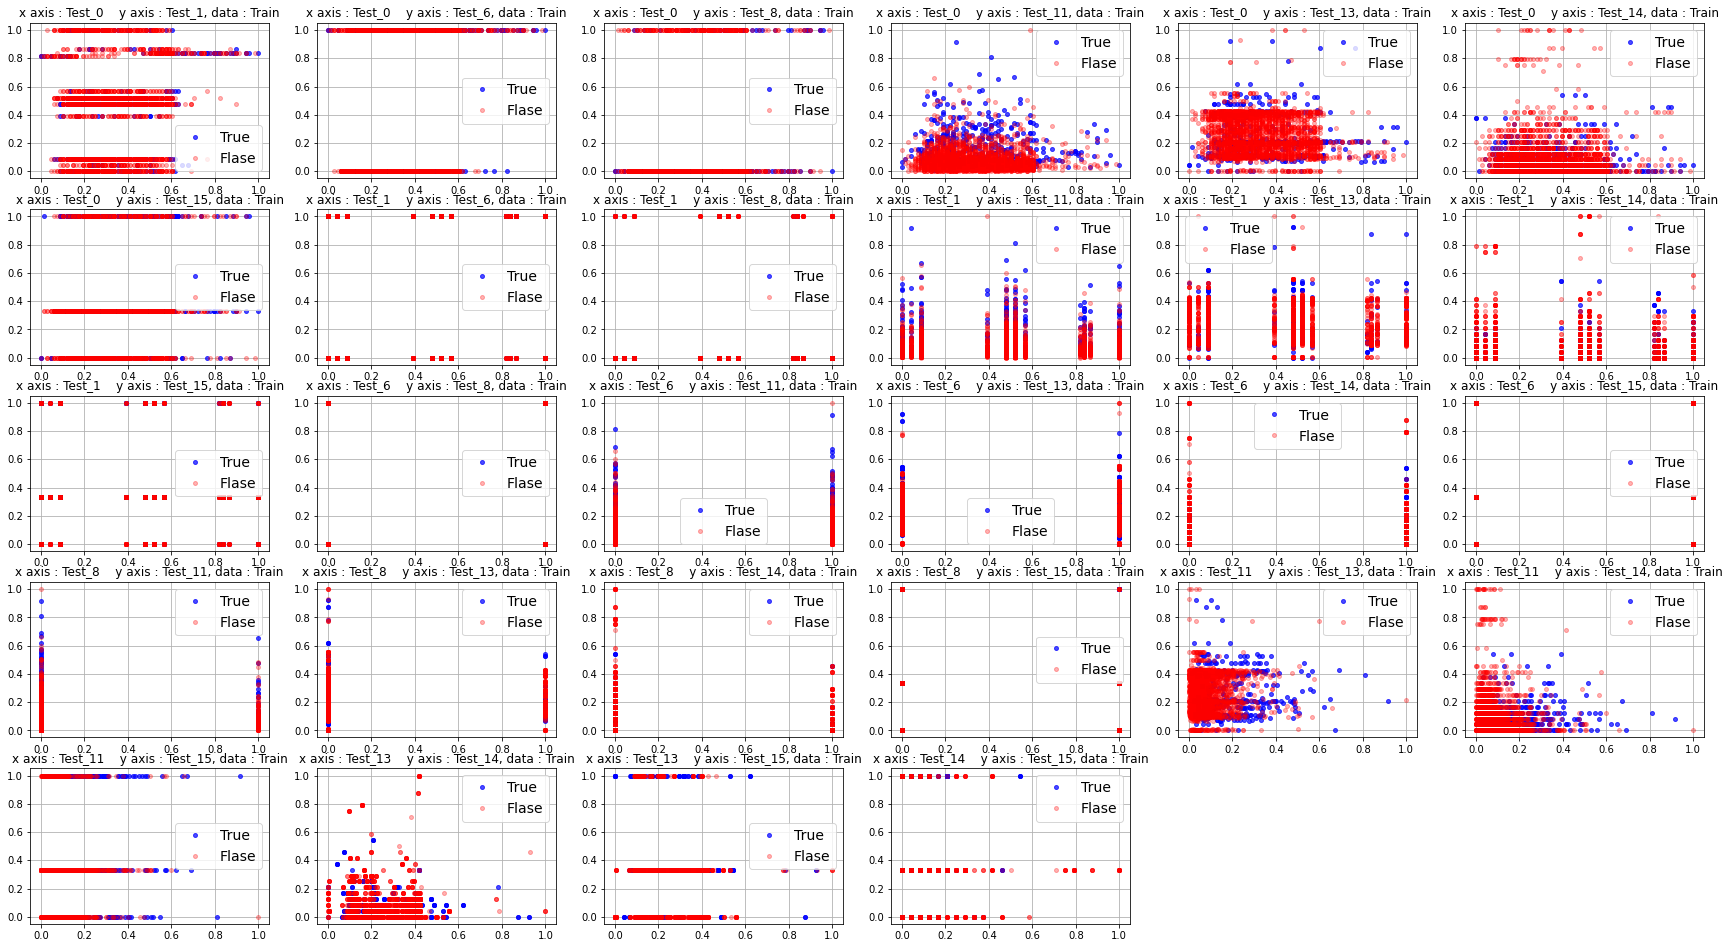

Start training...
Train with Distance algorithm...
best parameters for grid serch: {'order': 1}

Train with Linear algorithm...
best parameters for grid serch: {'parameters': array([[ 0.0908840972,  0.0117414389,  0.0524735579,  0.0450341437,
        -0.0183886493, -0.1143164212,  0.0236075816,  0.0430860792,
         0.0315814338,  0.0019207576,  0.0629084104,  1.3094040382,
        -0.2063096792,  0.0303426602,  0.0752222189,  0.2454554581,
        -0.224019489 ]]), 'thresh': 0.3061224489795918, 'eps': -2.0}

Train with MLP algorithm...
best parameters for grid search : {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (1024, 256, 32), 'learning_rate': 'adaptive', 'max_iter': 500, 'solver': 'adam', 'tol': 1e-07}

Train with Forest algorithm...
best parameters for grid search : {'criterion': 'entropy', 'max_depth': 1024, 'max_features': 'log2', 'n_estimators': 200}

Train with SVC algorithm...
best parameters for grid search : {'C': 100, 'gamma': 1, 'kernel': 'rbf'}

Train w

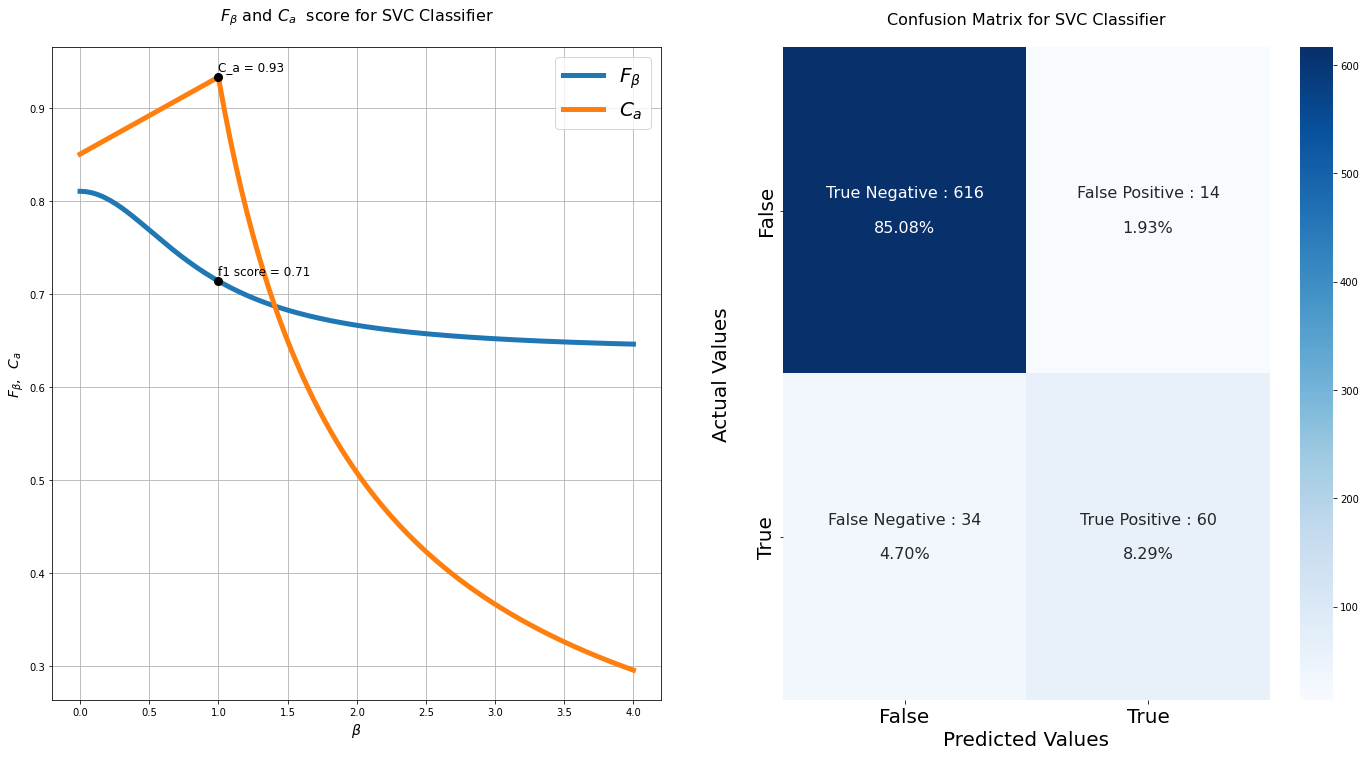

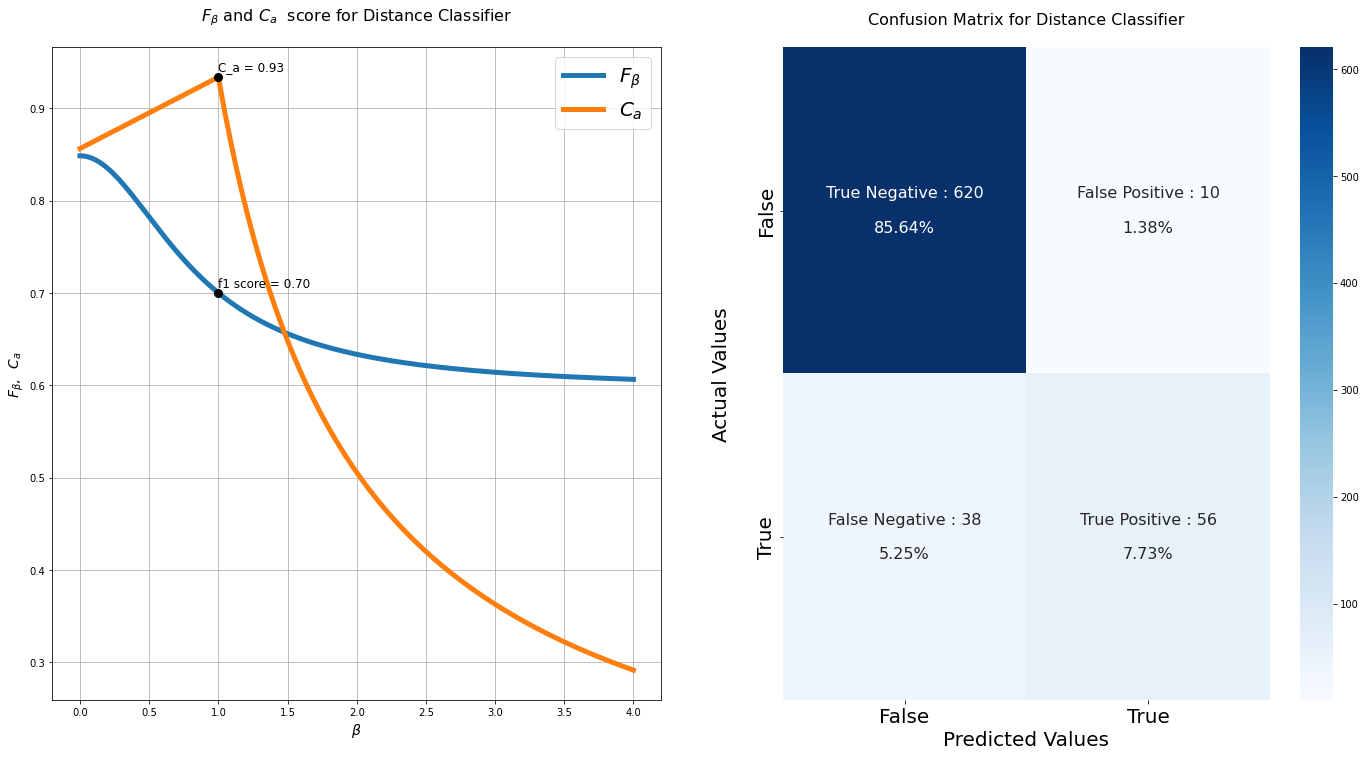

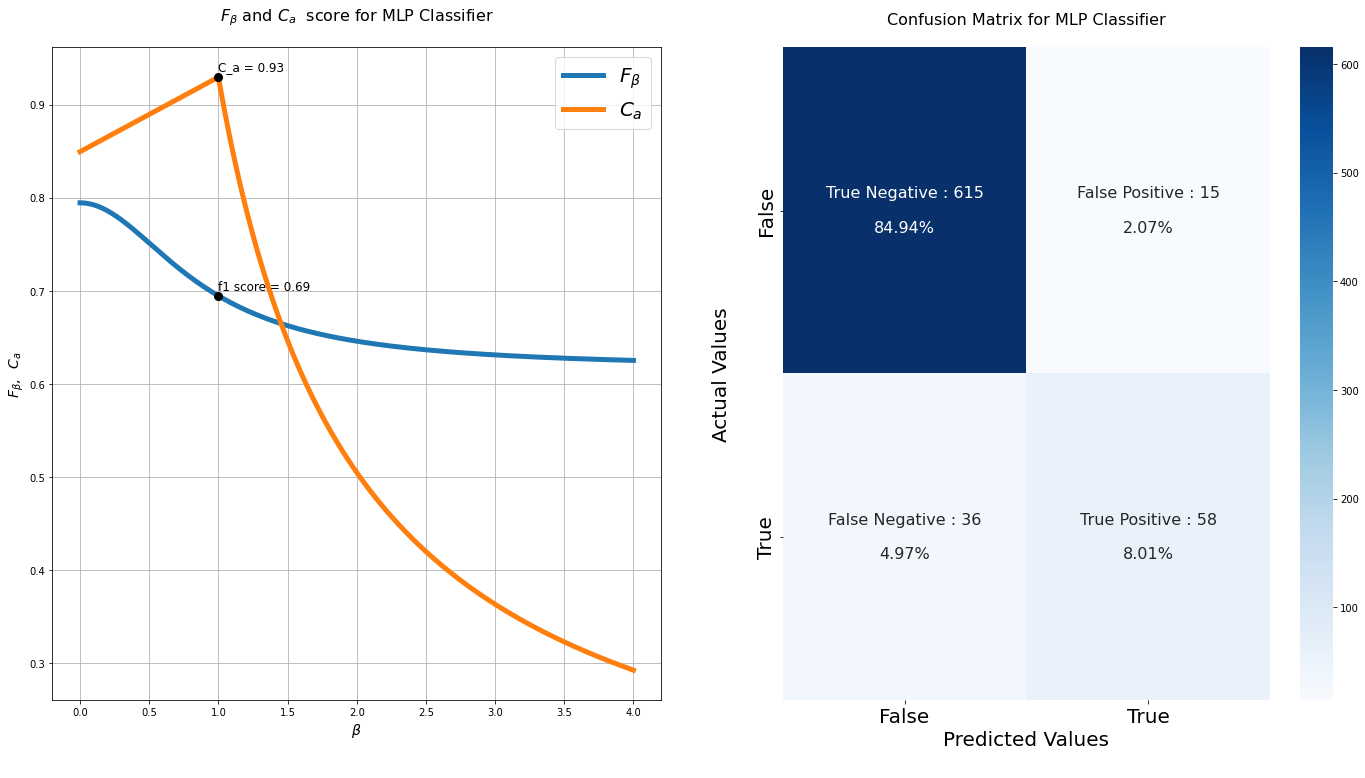

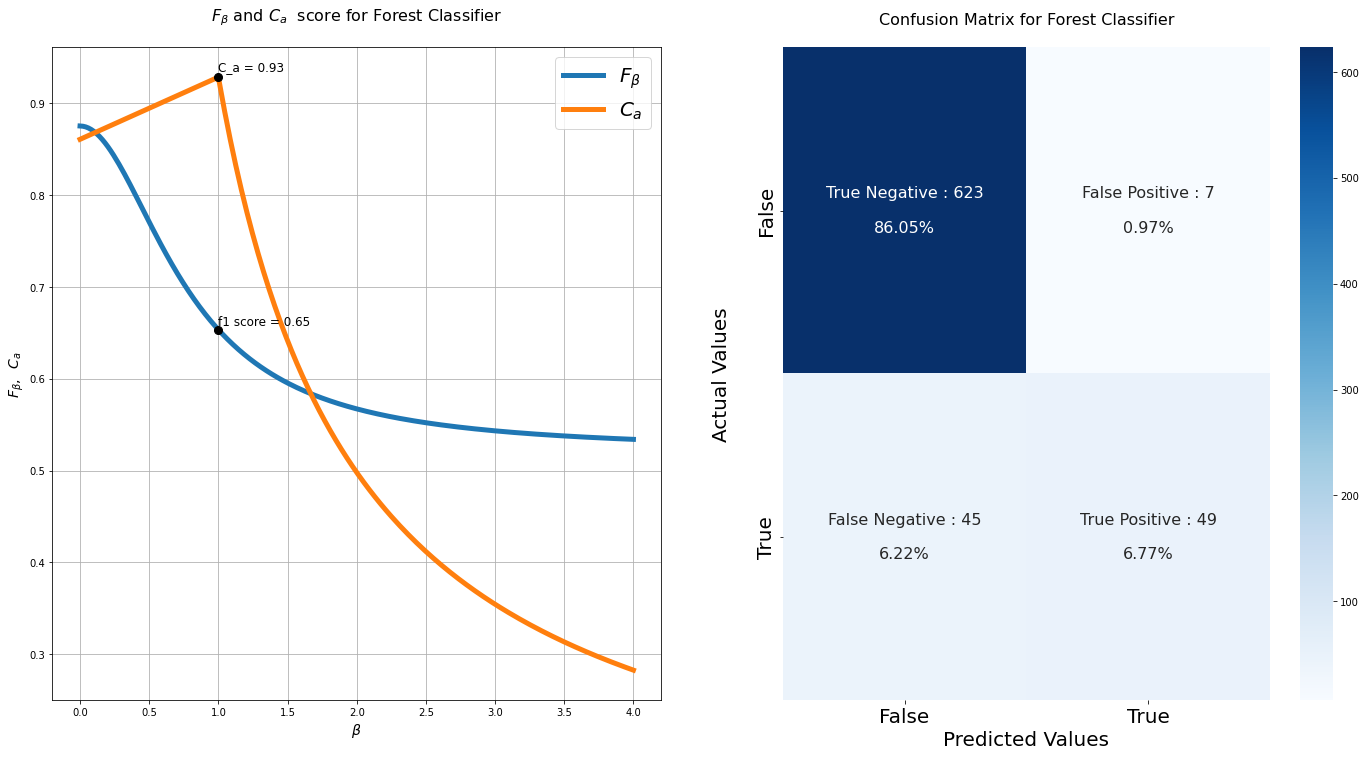

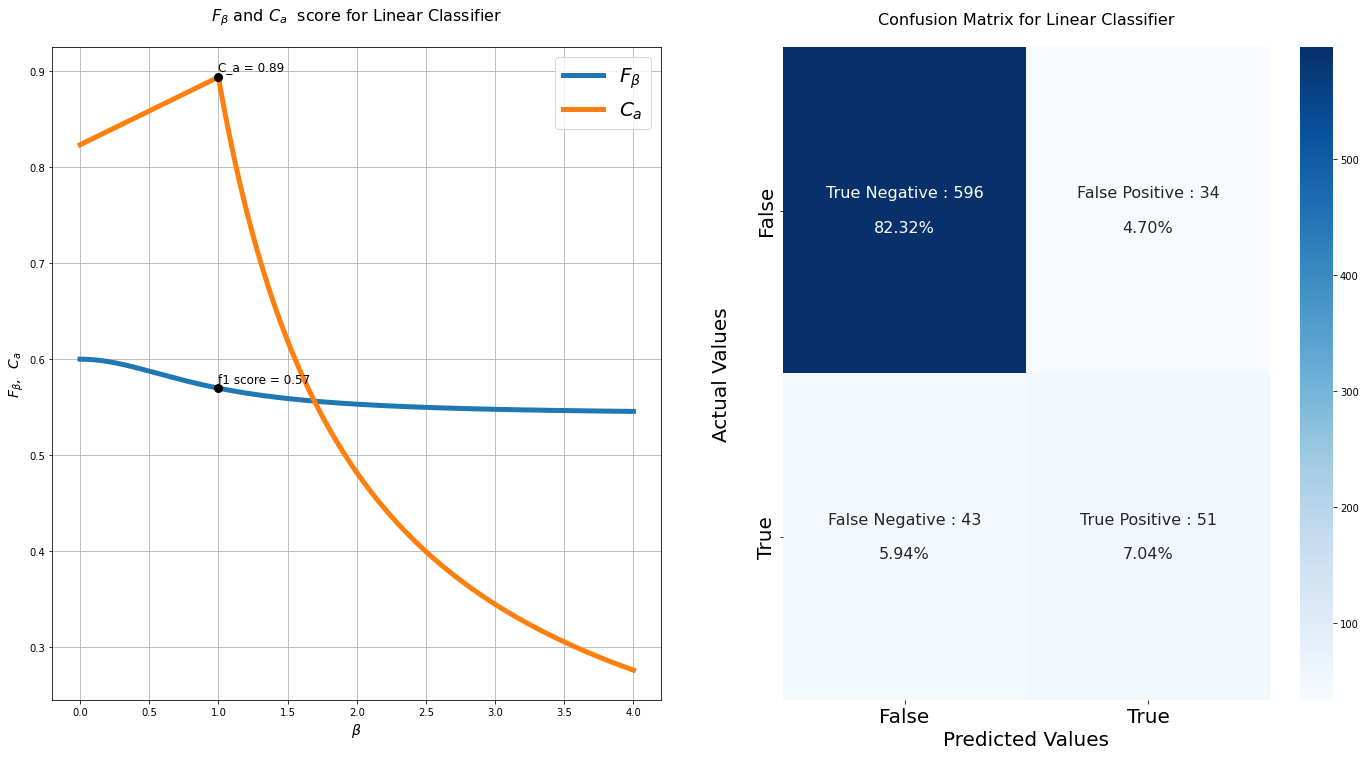

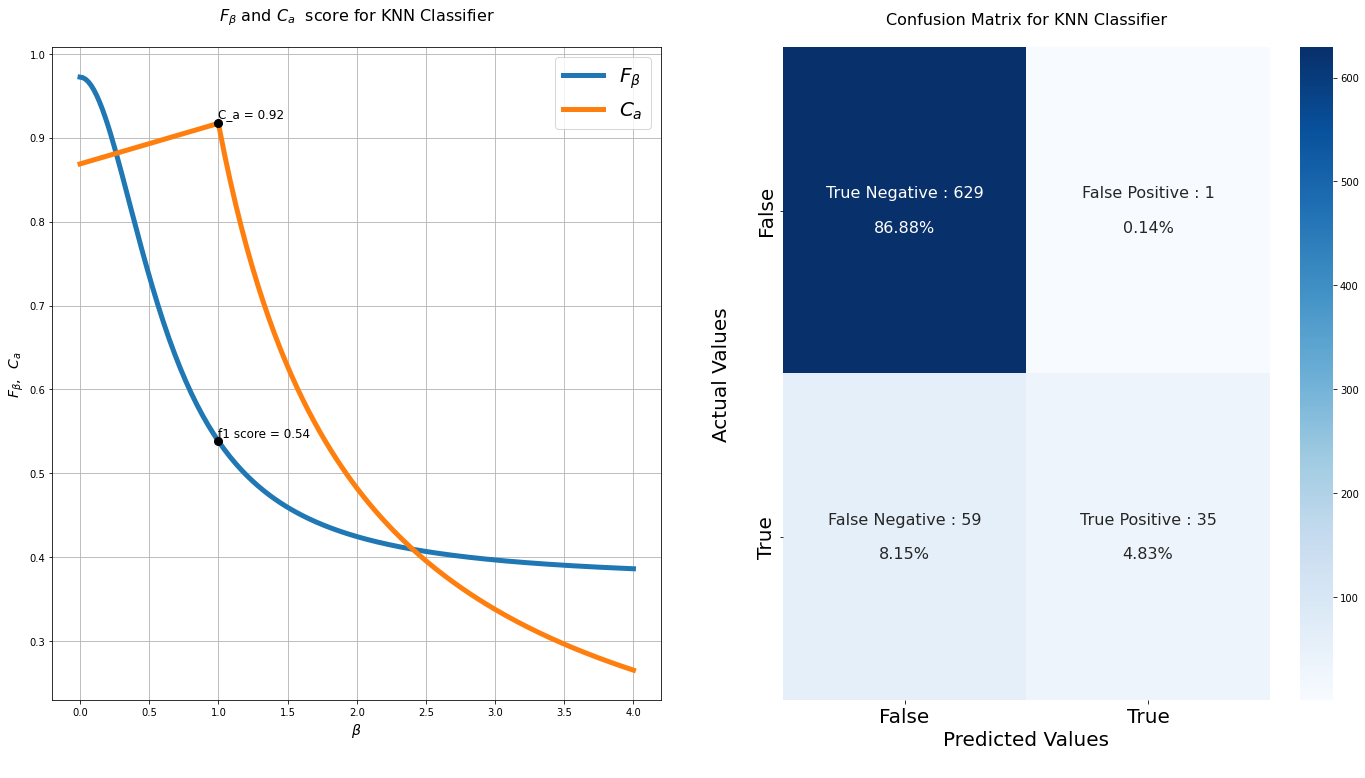

Start Testing...
End testing.



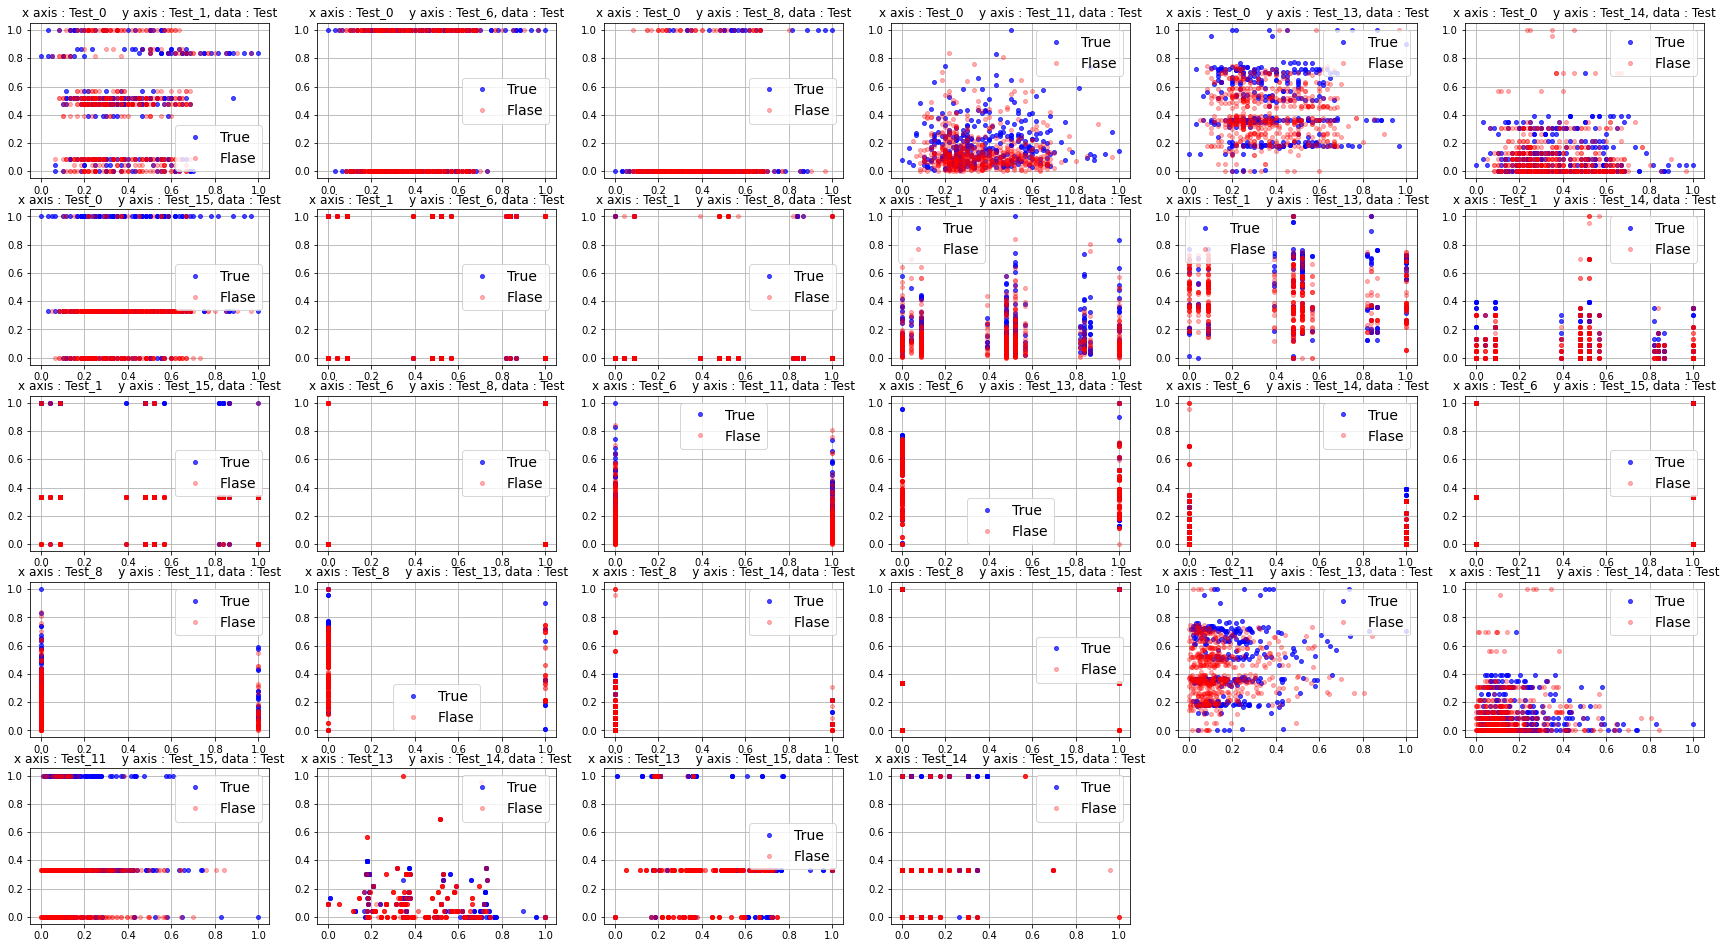

In [3]:
class RMA_ML:
    class HyperParameters:
        url_train = r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_train_data.csv'
        url_test = r'https://raw.githubusercontent.com/NI-DS/rma_assignment/main/Input/rma_test_data.csv'
        label = 'RMA'
        mapping = {False: 0, True: 1,
                  'A': 1, 'B': 15, 'C': 3, 'D': 4, 'E': 5, 'F': -6, 'G': -7, 'H': -8, 'J': 10.8, 'K': 11.9, 'L': 11.3,
                  'Low': -1, 'Mid': 2, 'High': 3.4,
                  'OP-1': 1, 'OP-4': -3, 'OP-17': 7,
                  'jan': 1, 'feb': 2, 'mar': -3, 'apr': 4, 'may': -5, 'jun': 6, 'jul': 5, 'aug': 8, 'sep': 9, 'oct': 10.2, 'nov': 13, 'dec': -12,
                  'TP-1549': 1, 'TP-235z': 2, 'TP-9941': 0.5}
        methods = {'add_nan': {'keys': [-1, 0]},
                  'MinMaxScaler_df': {},
                  'fill_with_closet': {'with_same_label': True}
                  }
        features_visualize = ['Test_0', 'Test_1', 'Test_6', 'Test_8', 'Test_11', 'Test_13', 'Test_14', 'Test_15']
        algoritms = ['Distance', 'Linear', 'MLP', 'Forest', 'SVC', 'KNN']
        spit_size = 0.2
        cv = 3
        metric_func=f1_score
        statistic_names = ['accuracy', 'precision', 'recall', 'f_1 score', 'costume acceracy']
        parameters_grid = {
                   'Distance' : {
                                'classifier': None, 'param_grid': {
                                                                  'orders': [1, 2, 3, 4, float('inf')]
                                                                  }
                                },
                   
                  'Linear': {
                            'classifier': None, 'param_grid': {
                                                              'lamdas': [0],
                                                              'epsilons': np.linspace(start=-2, stop=0, num=50),
                                                              'thresholds': np.linspace(start=0, stop=1, num=50)
                                                              }
                            },
                   
                   'MLP': {
                          'classifier': MLPClassifier(), 'param_grid': {
                                                                       'hidden_layer_sizes': [(64,32), (128,64, 32), (1024, 256, 32)],
                                                                       'max_iter': [500],
                                                                       'activation': ['relu', 'tanh'],
                                                                       'solver': ['adam'],
                                                                       'alpha': [0.05, 0.01],
                                                                       'learning_rate': ['adaptive'],
                                                                       'tol' : [0.0000001] #tolerance for early stopping
                                                                        }
                          },
                   
                   'Forest': {
                             'classifier': RandomForestClassifier(), 'param_grid': { 
                                                                                   'n_estimators': [100, 150, 200],
                                                                                   'max_features': ['sqrt', 'log2', 'auto'],
                                                                                   'max_depth' : [512, 1024],
                                                                                   'criterion' :['gini', 'entropy']
                                                                                    }
                             },
                   
                   'SVC': {
                          'classifier': SVC(), 'param_grid': {
                                                            'C': [0.1, 1, 100],
                                                            'gamma': [1, 0.01, 0.0001],
                                                            'kernel': ['linear', 'poly','rbf']
                                                             }
                          },
                   
                   'KNN': {
                          'classifier': KNeighborsClassifier(), 'param_grid': {
                                                                              'n_neighbors': list(range(7, 15)),
                                                                              'weights': ['uniform', 'distance'],
                                                                               'p': [1, 2],
                                                                               'algorithm': ['ball_tree']
                                                                              }
                          },
                   }

    class RMA_data:
        
        def __init__(self, url, kind, label=None):
            self.data =  pd.read_csv(url)
            self.kind = kind
            self.label = label


        def clean(self):
            self.data.dropna(inplace=True)
            self.data.replace({False: 0, True: 1}, inplace=True)

        def numeric(self):
            self.data.replace(RMA_ML.HyperParameters.mapping, inplace=True)
        
        def correlation_data(self, ax, title='', cmap='coolwarm'):
            corr_data = self.data.corr()
            sns.heatmap(corr_data, xticklabels=corr_data.columns.values, yticklabels=corr_data.columns.values, annot=True, ax=ax, cmap=cmap, annot_kws={"size": 16})
            ax.set_title(title, fontsize=18)

        def StandardScaler_df(self, to_mu=0 , to_sigma=1):
            scaler = preprocessing.StandardScaler().fit(self.data)
            self.data.loc[:] = to_sigma * scaler.transform(self.data) + to_mu

        def MinMaxScaler_df(self, to_domain=[0, 1], power=1):
            scaler = preprocessing.MinMaxScaler()
            self.data.loc[:] = to_domain[0] + (to_domain[1] - to_domain[0]) * scaler.fit_transform(self.data) ** power

        def Normalize_df(self, norm='l2', axis=1, norm_to=1):
            self.data.loc[:] = norm_to * preprocessing.normalize(self.data, norm='l2')

        def My_MixMax_df(self, func, f_domain=[0, 1], to_domain=[0, 1]):
            def g_func(x, func, f_domain, to_domain):
                val =  f_domain[0] + (x - min(x)) * (f_domain[1] - f_domain[0]) / (max(x) - min(x))
                val = (func(val) - func(f_domain[0])) / (func(f_domain[1]) - func(f_domain[0]))
                return to_domain[0] + (to_domain[1] - to_domain[0]) * val
            for i in range(self.data.shape[1]):
                self.data.iloc[:, i] = g_func(self.data.iloc[:, i], func=func, f_domain=f_domain, to_domain=to_domain)


        def add_nan(self, keys):
            self.data.replace(dict.fromkeys(keys, np.nan), inplace=True)

        @staticmethod
        def closet_sample(X, sample, row_sample, null_cols):
            sample = np.delete(sample, null_cols, 0)
            partial_X = np.delete(X, null_cols, 1)
            bla_idx = np.argmin(np.linalg.norm(partial_X - np.ones(shape=(partial_X.shape[0], 1)) @ sample[None, :], axis=1))
            return X[bla_idx]

        def fill_with_closet(self, with_same_label=True):
            clean_df = self.data.dropna()
            for r in range(self.data.shape[0]):
                row = self.data.iloc[r]
                if pd.isna(row).sum():
                    null_cols = np.argwhere(np.isnan(row.values))
                    if self.kind == 'Train':
                        close_sample = self.closet_sample(clean_df[clean_df[self.label] == row[self.label]].values, row.values, r, null_cols)
                    elif self.kind == 'Test':
                        close_sample = self.closet_sample(clean_df.values, row.values, r, null_cols)
                    else:
                        return None
                    for feat_idx in null_cols:
                        self.data.iloc[r, feat_idx] = close_sample[feat_idx]

        def fill_with_mode(self):
            for col in self.data.columns:
                self.data[col] = self.data[col].fillna(self.data[col].mode()[0])

        def fill_with_mean(self):
            for col in self.data.columns:
                self.data[col] = self.data[col].fillna(self.data[col].mean())

        def fill_with_prob(self):
            clean_df = deepcopy(self.data.dropna())
            for col in clean_df.columns:
                prob_dict = (clean_df[col].value_counts() / clean_df.shape[0]).to_dict()
                random_values = np.random.choice(list(prob_dict.keys()), size=self.data.shape[0], replace=True, p=list(prob_dict.values()))
                for i, val in enumerate(self.data[col].values):
                    if pd.isnull(val):
                        self.data[col].values[i] = random_values[i]

        def fill_interpolate(self):
            self.data = self.data.interpolate()

        def normalize_label(self, to_domain=[0, 1]):
            if self.label is not None:
                self.data[self.label] = to_domain[0] + (to_domain[1] - to_domain[0]) * (self.data[self.label] - self.data[self.label].min()) / (self.data[self.label].max() - self.data[self.label].min())

        @staticmethod
        def clean_axes(ax, n_rows, n_cols):
            for r in range(n_rows):
                for c in range(n_cols):
                    ax[r, c].set_visible(False)

        def scatter_plot(self, fig_size=(36, 22)):
            features_visualize = RMA_ML.HyperParameters.features_visualize
            num_of_graphs = len(features_visualize) * (len(features_visualize) - 1) / 2
            n_rows = int(np.ceil(num_of_graphs ** (1/2)))
            fig, ax = plt.subplots(n_rows, n_rows, figsize=fig_size)
            self.clean_axes(ax, n_rows, n_rows)
            labels = []
            for i, label_1 in enumerate(features_visualize):
                for label_2 in features_visualize[i+1:]:
                    labels.append([label_1, label_2])
            
            self.clean_axes(ax, n_rows, n_rows)
            for i, labs in enumerate(labels):
                label_1, label_2 = labs
                r, c = int(i / n_rows), i % n_rows
                ax[r, c].set_visible(True)
                if self.label is not None:
                    df_X = self.data[self.data.columns.difference([self.label])]
                    df_y = self.data[self.label]
                    df_X_True = df_X[df_y == 1]
                    df_X_False = df_X[df_y == 0]
                    ax[r, c].plot(df_X_True[label_1].values, df_X_True[label_2].values, 'o', color='b', label='True', alpha=0.7, markersize=4)
                    ax[r, c].plot(df_X_False[label_1].values, df_X_False[label_2].values, 'o', color='r', label='Flase', alpha=0.3, markersize=4)
                    ax[r, c].legend(prop={'size': 14})
                else:
                    ax[r, c].plot(self.data[label_1], self.data[label_2], 'o', alpha=1, markersize=4)
                ax[r, c].set_title(f'x axis : {label_1}    y axis : {label_2}, data : {self.kind}')
                ax[r, c].grid()
            plt.show()

    def __init__(self):
        self.train = self.RMA_data(self.HyperParameters.url_train, kind='Train', label=self.HyperParameters.label) 
        self.test = self.RMA_data(self.HyperParameters.url_test, kind='Test')

        self.train_copy = deepcopy(self.train)
        self.test_copy = deepcopy(self.test)
        self.tets_filled = deepcopy(self.test.data)

        self.X_train = []
        self.y_train = []

        self.X_eval = []
        self.y_eval = []

        self.X_test = []
        self.y_test = []

        self.y_predictions = []
        self.statistics = []
        self.best_result = {}
        self.current_algorithms = []

    def clean(self):
        self.train.clean()
        self.test.clean()

    def back_to_start(self):
        self.train = deepcopy(self.train_copy) 
        self.test = deepcopy(self.test_copy)


    @staticmethod
    def clean_axes(ax, n_rows, n_cols):
        for r in range(n_rows):
            for c in range(n_cols):
                ax[r, c].set_visible(False)

    def plot_histograms_features(self, text, alpha=[1, 0.5], fig_size=(50, 20)):
        df_list = [self.train.data, self.test.data]
        colunms_lengths = np.array([[df.shape[1] for df in df_list]])
        max_cols_idx = np.argmax(colunms_lengths)
        max_cols = colunms_lengths[max_cols_idx][0]
        n_rows = int(np.ceil(max_cols ** (1/2)))
        fig, ax = plt.subplots(n_rows, n_rows, figsize=fig_size)
        self.clean_axes(ax, n_rows, n_rows)
        for i, feat in enumerate(df_list[max_cols_idx].columns):
            r, c = int(i / n_rows), i % n_rows
            ax[r, c].set_visible(True)
            for df, TEXT, ALPHA in zip(df_list, text, alpha):
                n_bins = min(100, 3 * len(set(df_list[0][feat])))
                if feat in df.columns:
                    ax[r, c].hist(df[feat], bins=n_bins, weights=np.ones_like(df[feat]) / len(df[feat]), label=TEXT, alpha=ALPHA)
            ax[r, c].set_title(f'{feat}', fontsize=14)
            ax[r, c].legend(loc='upper right')
            ax[r, c].grid()
        plt.show()



    def correlation(self, fig_size=(36, 16), cmap='coolwarm'):
        fig, ax = plt.subplots(ncols=2, figsize=fig_size)
        self.train.correlation_data(ax=ax[0], title='Test correlation', cmap='coolwarm')
        self.test.correlation_data(ax=ax[1], title='Test correlation', cmap='coolwarm')


    def PreProcess(self):
        print('Start preprecessing...')
        methods = self.HyperParameters.methods
        if 'add_nan' in methods.keys():
            self.train.add_nan(**methods['add_nan'])
            self.test.add_nan(**methods['add_nan'])

        self.train.numeric()
        self.test.numeric()

        if 'StandardScaler_df' in methods.keys():
            self.train.StandardScaler_df(**methods['StandardScaler_df'])
            self.test.StandardScaler_df(**methods['StandardScaler_df'])
        
        if 'MinMaxScaler_df' in methods.keys():
            self.train.MinMaxScaler_df(**methods['MinMaxScaler_df'])
            self.test.MinMaxScaler_df(**methods['MinMaxScaler_df'])
        
        if 'My_MixMax_df' in methods.keys():
            self.train.My_MixMax_df(**methods['My_MixMax_df'])
            self.test.My_MixMax_df(**methods['My_MixMax_df'])
        
        if 'Normalize_df' in methods.keys():
            self.train.Normalize_df(**methods['Normalize_df'])
            self.test.Normalize_df(**methods['Normalize_df'])
        

        if 'fill_with_mean' in methods.keys():
            self.train.fill_with_mean()
            self.test.fill_with_mean()
        
        if 'fill_with_mode' in methods.keys():
            self.train.fill_with_mode()
            self.test.fill_with_mode()
        
        if 'fill_with_prob' in methods.keys():
            self.train.fill_with_prob()
            self.test.fill_with_prob()
        
        if 'fill_interpolate' in methods.keys():
            self.train.fill_interpolate()
            self.test.fill_interpolate()
        
        if 'fill_with_closet' in methods.keys():
            self.train.fill_with_closet(**methods['fill_with_closet'])
            self.test.fill_with_closet(**methods['fill_with_closet'])

        self.train.normalize_label(to_domain=[0, 1])


        self.store_preprocess_data()
        print('End preprecessing.')


    def store_preprocess_data(self, expand=True, delete_cols = []):

        def expand(X):
            return np.c_[X, np.ones(shape=(X.shape[0], 1))]

        df_features = self.train.data.drop(self.train.label, axis=1)
        df_labels = self.train.data[self.train.label]

        self.X_train, self.X_eval, self.y_train, self.y_eval = train_test_split(df_features.values, df_labels.values, test_size=self.HyperParameters.spit_size, random_state=42)
        self.X_test = self.test.data.values

        self.X_train = np.delete(self.X_train, delete_cols, 1)
        self.X_eval = np.delete(self.X_eval, delete_cols, 1)

        if expand:
            self.X_train = expand(self.X_train)
            self.X_eval = expand(self.X_eval)
            self.X_test = expand(self.X_test)


    def predict_by_distance(self, orders, verbose=True):
        max_metrica = -1
        y_best_pred = None
        for ORD in orders:
            y_pred =  np.array([self.y_train[np.argmin(np.linalg.norm(self.X_train - np.ones(shape=(self.X_train.shape[0], 1)) @ z_eval[None, :], ord=ORD, axis=1))] for z_eval in self.X_eval])
            metrica_val = self.HyperParameters.metric_func(self.y_eval, y_pred)
            if metrica_val > max_metrica:
                max_metrica = metrica_val
                y_best_pred = y_pred
                best_params_ = {'order': ORD}
        if verbose:
            print(f'best parameters for grid serch: {best_params_}\n')
        return y_best_pred, best_params_


    def linear_model(self, epsilons, thresholds, lamdas, verbose=True):
        max_metrica = -1
        y_best_pred = None
        for lam in lamdas:
            for THR in thresholds:
                for eps in epsilons:
                    parameters = (np.linalg.inv(self.X_train.T @ self.X_train + lam * self.X_train.shape[0] * np.eye(self.X_train.shape[1])) @ (self.X_train.T @ self.y_train + eps / np.sqrt(self.X_train.shape[1])))[:, None]
                    y_pred = np.where(self.X_eval @ parameters < THR, 0, 1)[:, 0]
                    metrica_val = self.HyperParameters.metric_func(self.y_eval, y_pred)
                    if metrica_val > max_metrica:
                        max_metrica = metrica_val
                        y_best_pred = y_pred
                        best_params_ = {'parameters': parameters.T, 'thresh': THR, 'eps': eps}
        if verbose:
            print(f'best parameters for grid serch: {best_params_}\n')
        return y_best_pred, best_params_


    def classifier_model(self, classifer, param_grid, verbose=True):
        grid = GridSearchCV(classifer, param_grid, n_jobs=-1, cv=self.HyperParameters.cv, scoring=make_scorer(self.HyperParameters.metric_func))
        grid.fit(self.X_train, self.y_train)
        y_pred = grid.predict(self.X_eval)
        best_pars = {'grid': grid, 'classifer': classifer, 'best_setups': grid.best_params_}
        if verbose:
            print(f'best parameters for grid search : {grid.best_params_}\n')
        return y_pred, best_pars

    @staticmethod
    def costume_accuracy(y_true, y_pred, Cost_matrix):
        Cost_matrix = (Cost_matrix - Cost_matrix.min().min()) / (Cost_matrix.max().max() - Cost_matrix.min().min())
        costume_loss = 0
        for val_hat, val_true in zip(y_true, y_pred):
            costume_loss += Cost_matrix[int(val_hat), int(val_true)]
        return costume_loss / len(y_true)

    def evaluate_statistics(self, y_pred):
        acc = accuracy_score(self.y_eval, y_pred)
        prec = precision_score(self.y_eval, y_pred)
        recall = recall_score(self.y_eval, y_pred)
        f_1 = f1_score(self.y_eval, y_pred)
        costume_acc = self.costume_accuracy(self.y_eval, y_pred, Cost_matrix=np.matrix([[1, 0], [0, 1]]))
        return [acc, prec, recall, f_1, costume_acc]

    def print_record(self):
        for row, stat in zip(np.array(self.statistics).T, self.HyperParameters.statistic_names):
            print(f'Sorted by {stat}.')
            idx = np.argsort(row)[::-1]
            for i, r_i in enumerate(idx):
                print(f'{i + 1}) {self.current_algorithms[r_i]:<10}, {stat} : {row[r_i]:.8f}')
            print('\n')
    
    def train_model(self):
        self.current_algorithms = self.HyperParameters.algoritms
        self.best_result = {}
        best_metrica = -1
        self.y_predictions, self.statistics = [], []
        print(f'Start training...')
        for algo in self.HyperParameters.algoritms:
            print(f'Train with {algo} algorithm...')
            classifier = self.HyperParameters.parameters_grid[algo]['classifier']
            param_grid = self.HyperParameters.parameters_grid[algo]['param_grid']
            if algo == 'Distance':
                y_pred, params = self.predict_by_distance(**param_grid)
            elif algo == 'Linear':
                y_pred, params = self.linear_model(**param_grid)
            elif algo in ['MLP', 'Forest', 'SVC', 'KNN']:
                y_pred, params = self.classifier_model(classifier, param_grid)
            else:
                continue

            stats = self.evaluate_statistics(y_pred)
            self.y_predictions.append(y_pred)
            self.statistics.append(stats)

            curr_metrica = self.HyperParameters.metric_func(self.y_eval, y_pred)
            if curr_metrica > best_metrica:
                best_metrica = curr_metrica
                self.best_result = params
                self.best_result['algoritm'] = algo
        print(f'End training.\n')


    def plot_results(self, fig_size=(24, 12)):
        self.y_predictions = self.y_predictions if isinstance(self.y_predictions, list) else [self.y_predictions]
        beta_vector = np.linspace(start=0, stop=4, num=200)
        metric_vector = np.array([self.HyperParameters.metric_func(self.y_eval, y_pred) for y_pred in self.y_predictions])
        sorted_algorithms = [self.current_algorithms[i] for i in np.argsort(metric_vector)[::-1]]
        sorted_predictions = [self.y_predictions[i] for i in np.argsort(metric_vector)[::-1]]
        for y_pred, algo in zip(sorted_predictions, sorted_algorithms):
            f_beta, c_acc = [], []
            for beta in beta_vector:
                f_beta.append(fbeta_score(self.y_eval, y_pred, beta=beta))
                c_acc.append(self.costume_accuracy(self.y_eval, y_pred, Cost_matrix=np.matrix([[1, 0], [0, beta]])))

            f1_score = fbeta_score(self.y_eval, y_pred, beta=1)
            acc_score = self.costume_accuracy(self.y_eval, y_pred, Cost_matrix=np.matrix([[1, 0], [0, 1]]))
            conf_matrix = confusion_matrix(self.y_eval, y_pred, labels=[0, 1])
            fig, ax = plt.subplots(1, 2, figsize=fig_size)

            ax[0].plot(beta_vector, f_beta, lw=5, label=r'$F_{\beta}$')
            ax[0].plot(beta_vector, c_acc, lw=5, label=r'$C_{a}$')

            ax[0].plot(1, f1_score, 'o', color='k', ms=8)
            ax[0].text(1, f1_score*1.008, f'f1 score = {f1_score:.2f}', fontsize=12)
            ax[0].plot(1, acc_score, 'o', color='k', ms=8)
            ax[0].text(1, acc_score*1.008, f'C_a = {acc_score:.2f}', fontsize=12)

            ax[0].set_xlabel(r'$\beta$', fontsize=14)
            ax[0].set_ylabel(r'$F_{\beta}, \;\; C_a$', fontsize=14)
            ax[0].set_title(r'$F_{\beta}$' + ' and ' +  r'$C_a$' + f'  score for {algo} Classifier\n', fontsize=16)
            ax[0].legend(prop={'size': 20})
            ax[0].grid()

            group_names = ['True Negative', 'False Positive', 'False Negative', 'True Positive']
            group_counts = ["{0:0.0f}".format(value) for value in conf_matrix.flatten()]
            group_percentages = ["{0:.2%}".format(value) for value in conf_matrix.flatten() / np.sum(conf_matrix)]
            labels = np.asarray([f"{v1} : {v2}\n\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]).reshape(2,2)
            sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues', annot_kws={"size": 16}, ax=ax[1])
            ax[1].set_title(f'Confusion Matrix for {algo} Classifier\n', fontsize=16);
            ax[1].set_xlabel('Predicted Values\n', fontsize=20)
            ax[1].set_ylabel('Actual Values\n', fontsize=20);
            ax[1].xaxis.set_ticklabels(['False','True'])
            ax[1].yaxis.set_ticklabels(['False','True'])
            ax[1].tick_params(axis='both', labelsize=20)
            plt.show()


    def distance_prediction(self, order):
            return np.array([self.y_train[np.argmin(np.linalg.norm(self.X_train - np.ones(shape=(self.X_train.shape[0], 1)) @ z_test[None, :], ord=order, axis=1))] for z_test in self.X_test])


    def linear_prediction(self, parameters, THR):
        return np.where(self.X_test @ parameters < THR, 0, 1)[:, 0]

    def test_model(self):
        print('Start Testing...')
        algoritm = self.best_result['algoritm']
        if algoritm == 'Distance':
            order = self.best_result['order']
            y_pred = self.distance_prediction(order)
        elif algoritm == 'Linear':
            print(self.best_result)
            parameters = self.best_result['parameters'].T
            THR = self.best_result['thresh']
            print(parameters)
            print(THR)
            y_pred = self.linear_prediction(parameters, THR)
        elif algoritm in ['MLP', 'Forest', 'SVC', 'KNN']:
            grid = self.best_result['grid']
            y_pred = grid.predict(self.X_test)
        else:
            return None
        self.test.label = deepcopy(self.train.label)
        self.y_test = y_pred
        self.test.data[self.train.label] = y_pred
        self.tets_filled[self.train.label] = y_pred.astype(bool)
        print('End testing.\n')
        return pd.DataFrame(y_pred)
    
    def save_model(self):
        self.tets_filled.to_csv('my_Results.csv', index = False)
        with open('my_good_model.pkl', 'wb') as f:
            pickle.dump(self, f)


rma = RMA_ML()

rma.clean()
rma.plot_histograms_features(text=['Train', 'Test'])
rma.back_to_start()



rma.PreProcess()

rma.plot_histograms_features(text=['PreProccess Train', 'PreProccess Test'])

rma.train.scatter_plot(fig_size=(30, 20))


rma.train_model()
rma.print_record()

rma.plot_results()
my_predictions = rma.test_model()

rma.test.scatter_plot(fig_size=(30, 20))
rma.save_model()